## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn import over_sampling 
from collections import Counter
from scipy import interp
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
## Exploratory data analysis

In [4]:
df = pd.read_csv(r'C:\Users\hp\Downloads\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

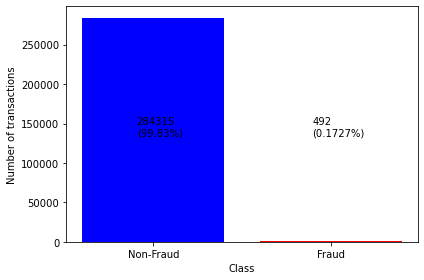

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.bar(['Non-Fraud','Fraud'], df['Class'].value_counts(), color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0], 
                                         df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()


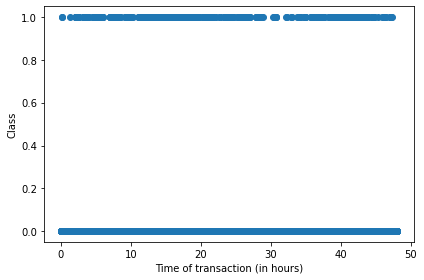

In [8]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df['Time']/(60*60), df['Class'])
plt.xlabel('Time of transaction (in hours)')
plt.ylabel('Class')

plt.tight_layout()
plt.show()

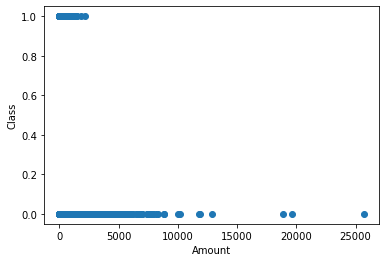

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.scatter(df['Amount'], df['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  31904  (11.2%)


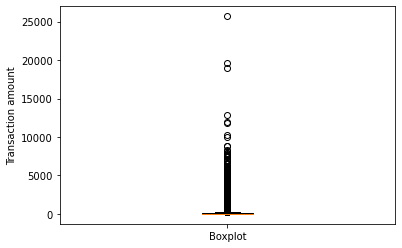

In [10]:
plt.boxplot(df['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
plt.plot()

amount = df[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

In [11]:
df[df['Class']==1].where(df['Amount']>upper_bound).count()['Amount']


91

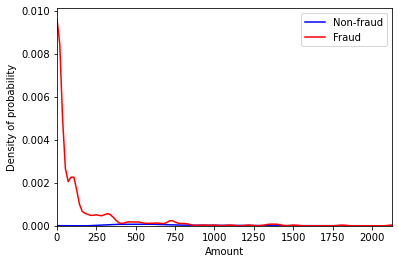

In [12]:

target_0 = df.loc[df['Class'] == 0]
target_1 = df.loc[df['Class'] == 1]
ax1=sns.distplot(target_0[['Amount']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['Amount']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(df[df['Class']==1]['Amount']))
ax2.set_xlim(0, max(df[df['Class']==1]['Amount']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')
plt.show()

In [13]:
df.loc[df['Class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

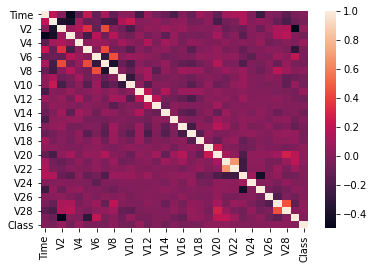

In [14]:
heatmap = sns.heatmap(df.corr(method='spearman'))

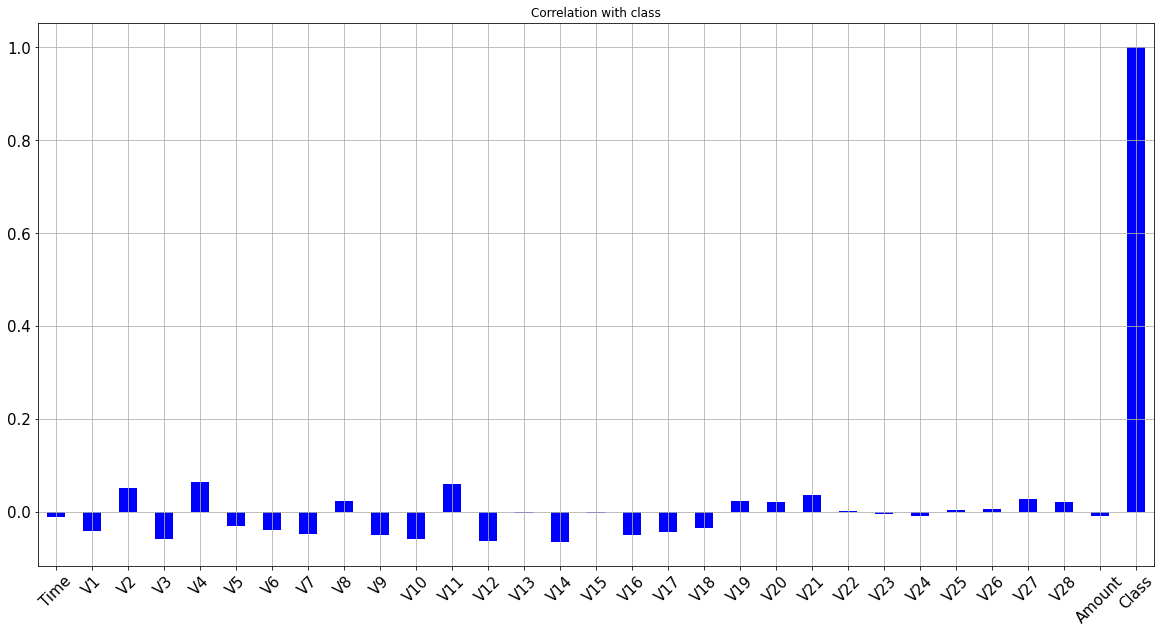

In [15]:

df.corrwith(df.Class, method='spearman').plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True, color=['blue'])
plt.show()

### Splitting the data into train & test data

In [16]:

y = df['Class']
X = df.drop(columns=['Class'])

In [17]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [18]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

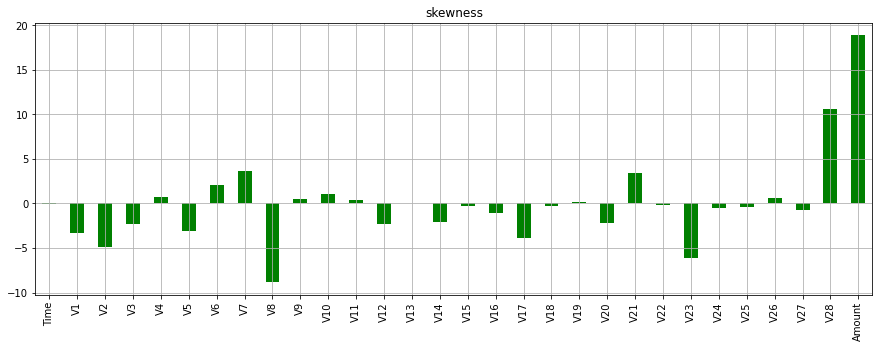

In [19]:
# plot the histogram of a variable from the dataset to see the skewness

X_train.skew(axis = 0, skipna = True).plot.bar(
        figsize = (15, 5), title = "skewness", fontsize = 10,
        rot = 90, grid = True, color=['green'])
plt.show()


we can see V8, V23 ,V28, Amount have very high skewness.

(array([    0., 91981., 93426.,  9056.,  1150.]),
 array([-3, -3,  0,  1,  2,  3]),
 <a list of 5 Patch objects>)

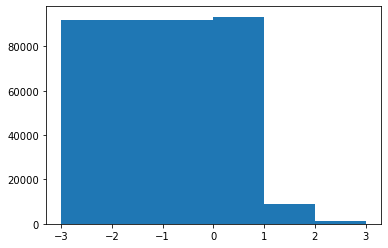

In [20]:
plt.hist(X_train['V8'], bins = [-3,-2-1,0,1,2,3,]) 

(array([     0., 103187.,  91832.,   2658.,    634.]),
 array([-3, -3,  0,  1,  2,  3]),
 <a list of 5 Patch objects>)

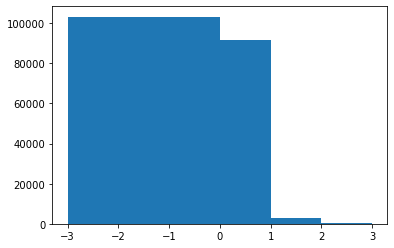

In [21]:
plt.hist(X_train['V23'], bins = [-3,-2-1,0,1,2,3,]) 

(array([0.00000e+00, 8.79150e+04, 1.10594e+05, 4.73000e+02, 9.40000e+01]),
 array([-3, -3,  0,  1,  2,  3]),
 <a list of 5 Patch objects>)

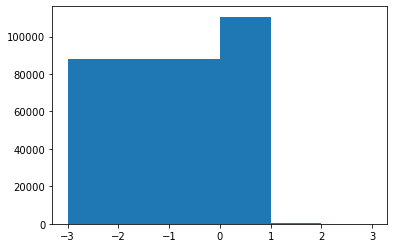

In [22]:
plt.hist(X_train['V28'], bins = [-3,-2-1,0,1,2,3,]) 

(array([    0.,     0., 11716., 21078.,  5816.]),
 array([-3, -3,  0,  1,  2,  3]),
 <a list of 5 Patch objects>)

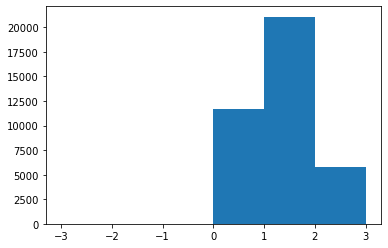

In [23]:
plt.hist(X_train['Amount'], bins = [-3,-2-1,0,1,2,3,]) 

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [24]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)
X_train = pt.transform(X_train)
pt.fit(X_test)
X_test = pt.transform(X_test)

In [25]:
X_train


array([[ 1.20861473, -0.2676968 ,  0.40478241, ...,  0.57846416,
         0.26703825, -0.61949392],
       [ 0.93071495,  1.16716777, -0.20178163, ..., -0.19553705,
        -0.16652054,  1.11976495],
       [-0.46267272, -0.79237276, -2.38547895, ..., -0.78377484,
         0.70492067,  2.26522877],
       ...,
       [-0.66222724, -0.95789142,  0.36893244, ..., -1.09956993,
         0.14867526,  0.32648629],
       [-1.26875436,  0.52069681, -0.03697308, ...,  0.06652736,
         0.08621695,  0.44474337],
       [-1.43686145, -0.57669208,  0.45426788, ...,  0.93938912,
         0.6400706 , -0.63052653]])

In [26]:
import scipy

from scipy.stats import skew
X_test

array([[ 0.70671984, -1.32786024,  1.32078504, ..., -0.47622526,
        -0.24115507,  0.33707654],
       [ 0.52189858, -0.40014922,  0.70082669, ...,  0.35206691,
         0.43984198, -0.46679042],
       [ 1.0982868 ,  0.12460974, -1.49533931, ..., -0.27330754,
         0.29232598,  1.9454743 ],
       ...,
       [ 0.68197183,  1.48395697, -0.64943594, ..., -0.1695858 ,
        -0.15070226,  0.72694418],
       [-1.09083555,  0.71708732, -0.02112823, ..., -0.13818102,
         0.02891486, -1.26632081],
       [ 0.04601712,  1.60990053, -0.44766783, ..., -0.17285178,
        -0.16973192, -0.15748315]])

# plot the histogram of a variable from the dataset again to see the result 


a=scipy.stats.skew(df3, axis=0, bias=True)
np.histogram(a,bins = [0,20,40,60,80,100]) 
hist,bins = np.histogram(a,bins = [0,20,40,60,80,100]) 
print (hist) 
print (bins)


In [27]:
# plot the histogram of a variable from the dataset again to see the result 


#a=scipy.stats.skew(df3, axis=0, bias=True)
#np.histogram(a,bins = [0,20,40,60,80,100]) 
#hist,bins = np.histogram(a,bins = [0,20,40,60,80,100]) 
#print (hist) 
#print (bins)

X_train_pt = pd.DataFrame({'time': X_train[:, 0], 'V1': X_train[:, 1],'V2': X_train[:, 2], 'V3': X_train[:, 3],'V4': X_train[:, 4],
                     'V5': X_train[:, 5],'V6': X_train[:, 6], 'V7': X_train[:, 7],'V8': X_train[:, 8],
                     'V9': X_train[:, 9],'V10': X_train[:, 10], 'V11': X_train[:, 11],'V12': X_train[:, 12],
                     'V13': X_train[:, 13],'V14': X_train[:, 14], 'V15': X_train[:, 15],'V16': X_train[:, 16],
                     'V17': X_train[:, 17],'V18': X_train[:, 18], 'V19': X_train[:, 19],'V20': X_train[:, 20],
                     'V21': X_train[:, 21],'V22': X_train[:, 22], 'V23': X_train[:, 23],'V24': X_train[:, 24],
                     'V25': X_train[:, 25],'V26': X_train[:, 26], 'V27': X_train[:, 27],'V28': X_train[:, 28],
                     'Amount': X_train[:, 29]})
                 


In [28]:
X_test_pt = pd.DataFrame({'time': X_test[:, 0], 'V1': X_test[:, 1],'V2': X_test[:, 2], 'V3': X_test[:, 3],'V4': X_test[:, 4],
                     'V5': X_test[:, 5],'V6': X_test[:, 6], 'V7': X_test[:, 7],'V8': X_test[:, 8],
                     'V9': X_test[:, 9],'V10': X_test[:, 10], 'V11': X_test[:, 11],'V12': X_test[:, 12],
                     'V13': X_test[:, 13],'V14': X_test[:, 14], 'V15': X_test[:, 15],'V16': X_test[:, 16],
                     'V17': X_test[:, 17],'V18': X_test[:, 18], 'V19': X_test[:, 19],'V20': X_test[:, 20],
                     'V21': X_test[:, 21],'V22': X_test[:, 22], 'V23': X_test[:, 23],'V24': X_test[:, 24],
                     'V25': X_test[:, 25],'V26': X_test[:, 26], 'V27': X_test[:, 27],'V28': X_test[:, 28],
                     'Amount': X_test[:, 29]})
#as we can see using power transform skewness of the data is greatly reduced for the columns which has high skewness.

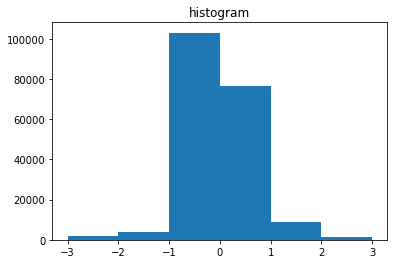

In [29]:
plt.hist(X_train_pt['V8'], bins = [-3,-2,-1,0,1,2,3,]) 
plt.title("histogram") 
plt.show()

(array([   332.,      0., 105625.,  85457.,   4405.,   1451.]),
 array([-4, -3, -3,  0,  1,  2,  3]),
 <a list of 6 Patch objects>)

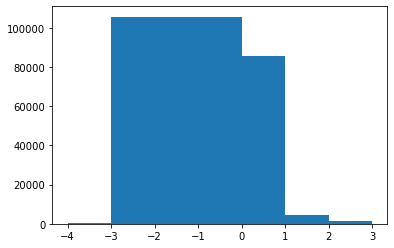

In [30]:
plt.hist(X_train_pt['V23'], bins = [-4,-3,-2-1,0,1,2,3,]) 

(array([   125.,    202.,    350.,    737.,      0.,  83862., 108291.,
          4067.,    720.]),
 array([-7, -6, -5, -4, -3, -3,  0,  1,  2,  3]),
 <a list of 9 Patch objects>)

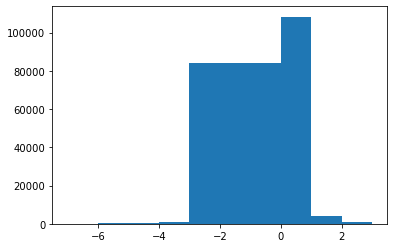

In [31]:
plt.hist(X_train_pt['V28'], bins = [-7,-6,-5,-4,-3,-2-1,0,1,2,3,]) 

(array([    0.,     0., 98483., 66941., 30661.,  3253.]),
 array([-4, -3, -3,  0,  1,  2,  3]),
 <a list of 6 Patch objects>)

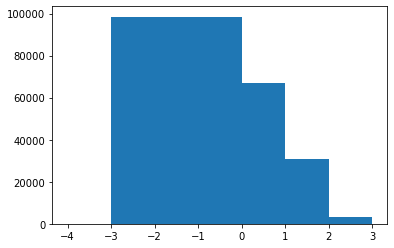

In [32]:
plt.hist(X_train_pt['Amount'], bins = [-4,-3,-2-1,0,1,2,3,])

## Model Building
- Build different models on the imbalanced dataset and see the result

In [251]:
#lets try some models to understand dataset and testing accuracy on the imbalanced dataset

In [33]:

classifiers = []

classifiers.append(('Logistic Regression', LogisticRegression(random_state=42)))
classifiers.append(('Naive Bayes', GaussianNB()))
#classifiers.append(('KNN', KNeighborsClassifier()))
#classifiers.append(('SVM', SVC(random_state=42, probability=True))) #This one takes a very long time to run!
#classifiers.append(('Decision Tree', DecisionTreeClassifier(random_state=42)))
#classifiers.append(('Random Forest', RandomForestClassifier(random_state=42)))

#Ensemble classifier - All classifiers have the same weight
eclf = VotingClassifier(estimators=classifiers, voting='soft', weights=np.ones(len(classifiers)))

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test):
    '''Plots the ROC curve and the confusion matrix, and calculates AUC, recall and precision.'''
    
    name = classifier[0]
    classifier = classifier[1]

    mean_fpr = np.linspace(0, 1, 100)
    class_names = ['Non-Fraud', 'Fraud']
    confusion_matrix_total = [[0, 0], [0, 0]]
    
    #Obtain probabilities for each class
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - model: ' + name)
    plt.legend(loc="lower right")
    plt.show()
    
    #Store the confusion matrix result to plot a table later
    y_pred=classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrix_total += cnf_matrix
    
    #Print precision and recall
    tn, fp = confusion_matrix_total.tolist()[0]
    fn, tp = confusion_matrix_total.tolist()[1]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy = {:2.2f}%'.format(accuracy*100))
    print('Precision = {:2.2f}%'.format(precision*100))
    print('Recall = {:2.2f}%'.format(recall*100))
    
    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(confusion_matrix_total, classes=class_names, title='Confusion matrix - model: ' + name)
    plt.show()

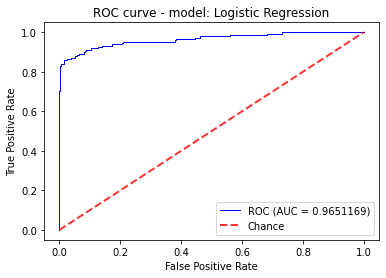

Accuracy = 99.92%
Precision = 84.55%
Recall = 62.84%


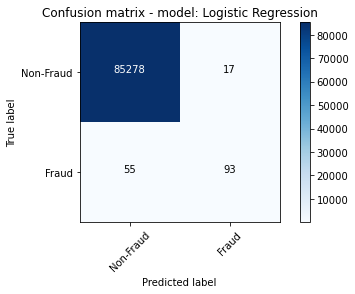

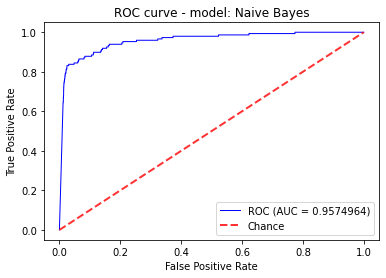

Accuracy = 97.76%
Precision = 5.97%
Recall = 81.08%


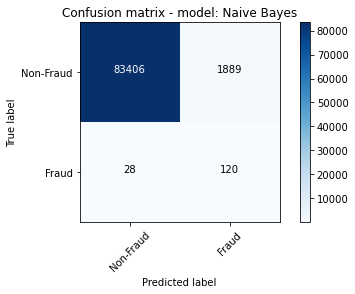

In [36]:
#perform cross-validation
for clf in classifiers:
    plot_CM_and_ROC_curve(clf, X_train, y_train, X_test, y_test)


In [37]:

from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [42]:
classifier=LogisticRegression(random_state=42)

In [43]:
all_accuracies = cross_val_score(estimator=classifier, X=X_train_pt, y=y_train, cv=5)

In [44]:
all_accuracies

array([0.99939809, 0.99917237, 0.99934793, 0.99927269, 0.99912219])

In [45]:
print(all_accuracies.mean()*100)

99.92626545391168


In [46]:
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import f1_score

# helper functions
def train_clf(clf, X_train, y_train):
    
    return clf.fit(X_train, y_train)
    
def pred_clf(clf, features, target):
    
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred, pos_label = 1)

def train_predict(clf, X_train, y_train, X_test, y_test):
    
    train_clf(clf, X_train, y_train)
    
    print("F1 score for training set is: {:.4f}".format(pred_clf(clf, X_train, y_train)))
    print("F1 score for testing set is: {:.4f}\n".format(pred_clf(clf, X_test, y_test)))

In [48]:
# load algorithms
nb = GaussianNB()

dtc = DecisionTreeClassifier(random_state=0)

abc = AdaBoostClassifier(random_state=0)


algorithms = [nb, dtc, abc]

for clf in algorithms:
    """
    print("\n{}: \n".format(clf.__class__.__name__))
    
    # create training data from first 100, then 200, then 300
    #for n in [179, 358, 537]:
        #train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)
    """        
    print("{}:".format(clf))
    train_predict(clf, X_train, y_train, X_test, y_test)

GaussianNB():
F1 score for training set is: 0.1165
F1 score for testing set is: 0.1113

DecisionTreeClassifier(random_state=0):
F1 score for training set is: 1.0000
F1 score for testing set is: 0.7097

AdaBoostClassifier(random_state=0):
F1 score for training set is: 0.7909
F1 score for testing set is: 0.7420



In [ ]:
# load algorithms
nb = GaussianNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
abc = AdaBoostClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)

algorithms = [nb,knn, dtc, rfc, abc, gbc]

for clf in algorithms:
    """
    print("\n{}: \n".format(clf.__class__.__name__))
    
    # create training data from first 100, then 200, then 300
    #for n in [179, 358, 537]:
        #train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)
    """        
    print("{}:".format(clf))
    train_predict(clf, X_train, y_train, X_test, y_test)

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [245]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size = 0.3, random_state=100)


In [ ]:
#perform cross-validation
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [246]:
#perform hyperparameter tuning
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split 
#print the evaluation result by choosing a evaluation metric
c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 
  
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
   
# Fit the best algorithm to the data. 
logreg_cv.fit(X_train_cv, y_train_cv)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.9992619340887252


In [247]:
clf = LogisticRegression(C=0.05179474679231213) 
 

clf.fit( X_train_cv, y_train_cv)

y_pred=clf.predict(X_test_cv)

In [248]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_cv, y_pred)
cnf_matrix

array([[59702,     9],
       [   35,    64]], dtype=int64)

Text(0.5, 1271.2, 'Predicted label')

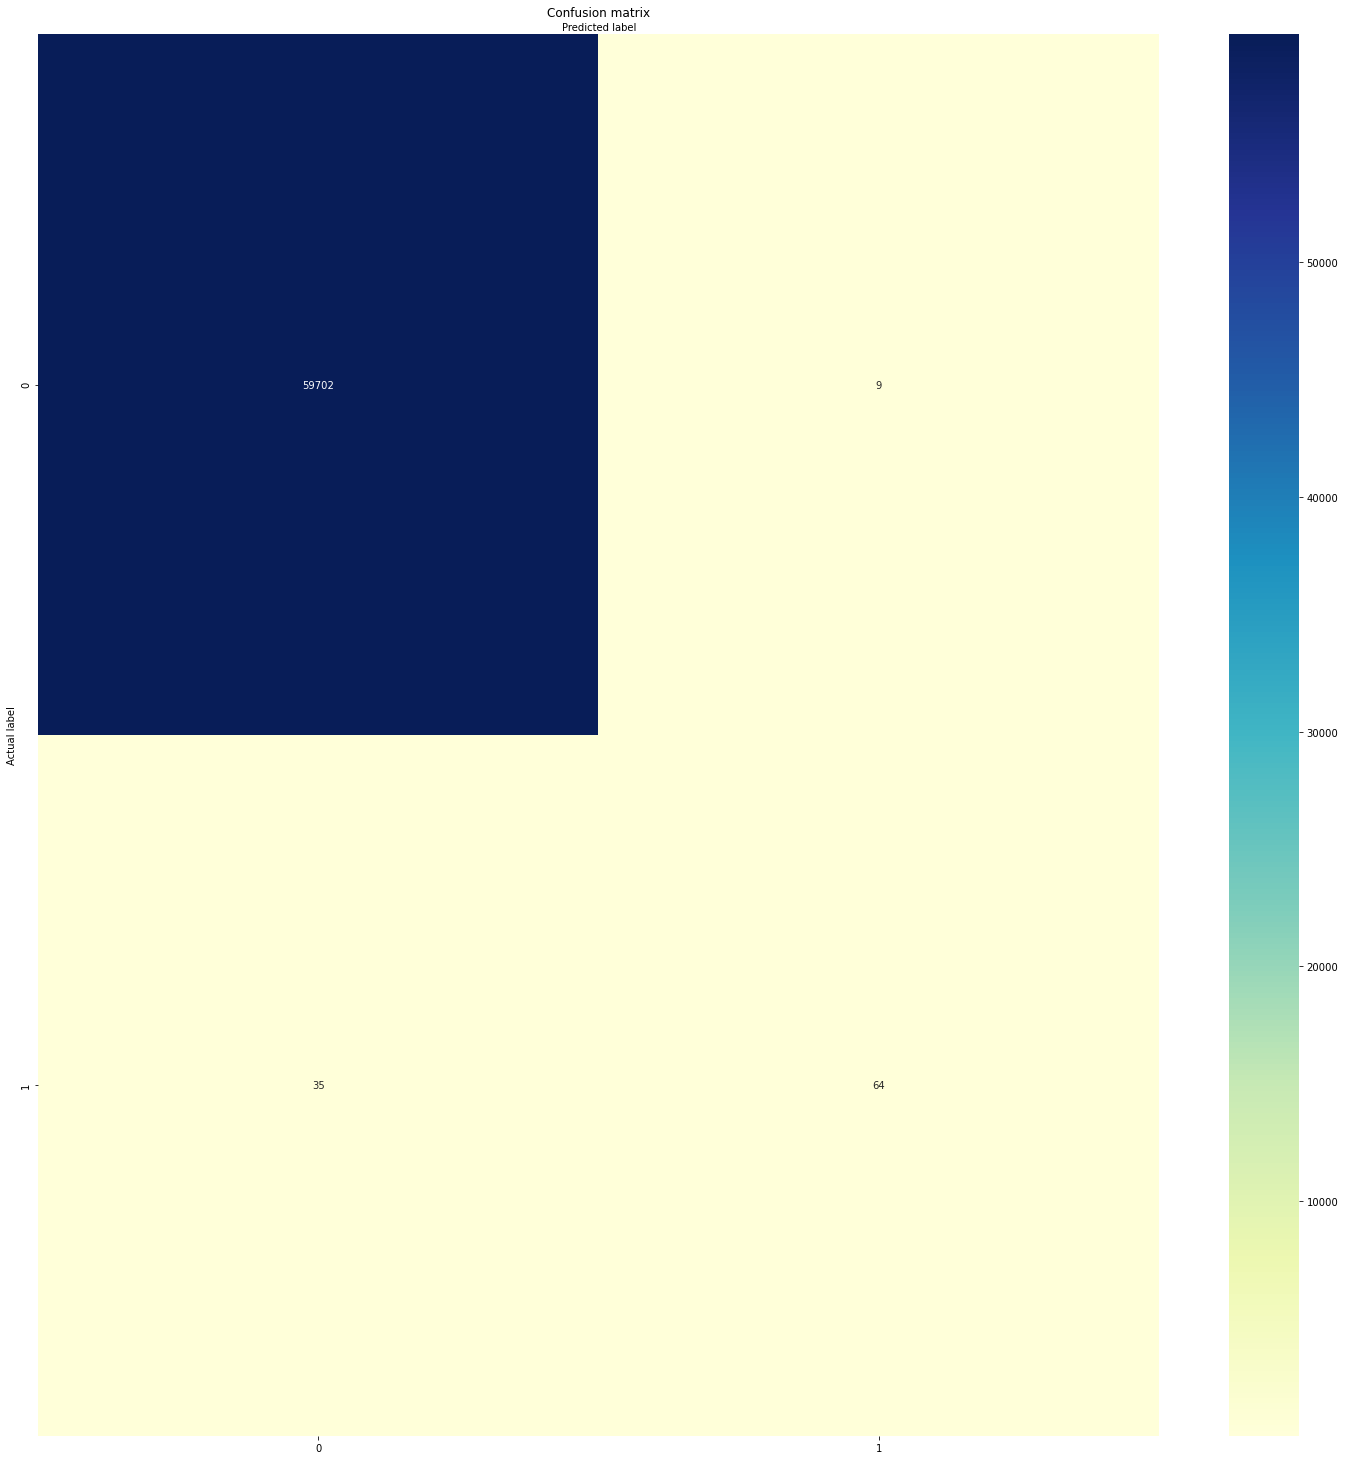

In [249]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [250]:
print("Accuracy:",metrics.accuracy_score(y_test_cv, y_pred))
print("Precision:",metrics.precision_score(y_test_cv, y_pred))
print("Recall:",metrics.recall_score(y_test_cv, y_pred))

Accuracy: 0.99926433706738
Precision: 0.8767123287671232
Recall: 0.6464646464646465


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [55]:
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_train_cv, y_train_cv) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 7}
Best score is 0.9993264240210935


In [56]:
clf = DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=8, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0) 
 

clf.fit(X_train_cv, y_train_cv)

y_pred=clf.predict(X_test_cv)

In [57]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_cv, y_pred)
cnf_matrix

array([[59692,    19],
       [   18,    81]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

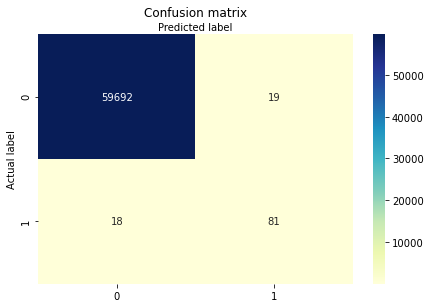

In [58]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test_cv, y_pred))
print("Precision:",metrics.precision_score(y_test_cv, y_pred))
print("Recall:",metrics.recall_score(y_test_cv, y_pred))

Accuracy: 0.999381374352115
Precision: 0.81
Recall: 0.8181818181818182


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [60]:
clf = LogisticRegression(C=3.72) 
 

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)



In [61]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[85278,    17],
       [   55,    93]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

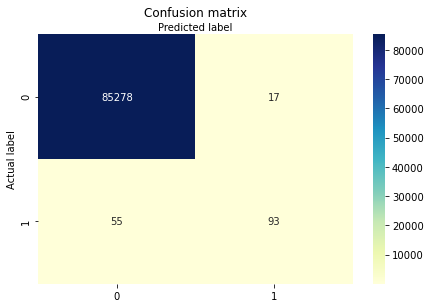

In [62]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9991573329588147
Precision: 0.8454545454545455
Recall: 0.6283783783783784


In [ ]:
#applying decision trees:

In [64]:
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4}
Best score is 0.9993780219592875


In [65]:
clf = DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=8, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0) 
 

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

In [66]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[85284,    11],
       [   45,   103]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

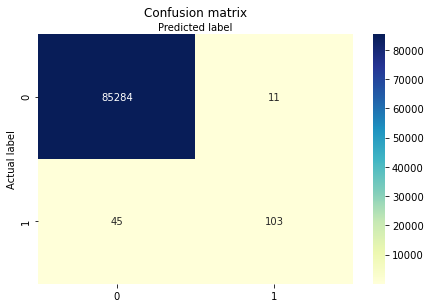

In [67]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9993445923013002
Precision: 0.9035087719298246
Recall: 0.6959459459459459


#### DECISION TREES PERFORMED BETTER

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [69]:
 clf.feature_importances_

array([1.01957628e-02, 1.62125339e-02, 5.49016587e-04, 3.58650535e-03,
       6.48037828e-03, 5.17439821e-03, 1.22630623e-03, 2.09944812e-01,
       1.70880703e-03, 2.66112174e-02, 1.76783417e-02, 1.48091972e-03,
       1.37351507e-03, 5.69173284e-04, 4.85047173e-01, 8.65491294e-03,
       8.40165056e-02, 2.73454983e-02, 5.62160956e-03, 6.54646450e-03,
       7.80659601e-03, 5.64456446e-03, 3.52371177e-03, 1.11450891e-03,
       3.78305397e-04, 1.31002842e-02, 1.48710002e-02, 3.09932318e-02,
       1.75706320e-03, 7.86881940e-04])

Top var = 15
2nd Top var = 8
3rd Top var = 17


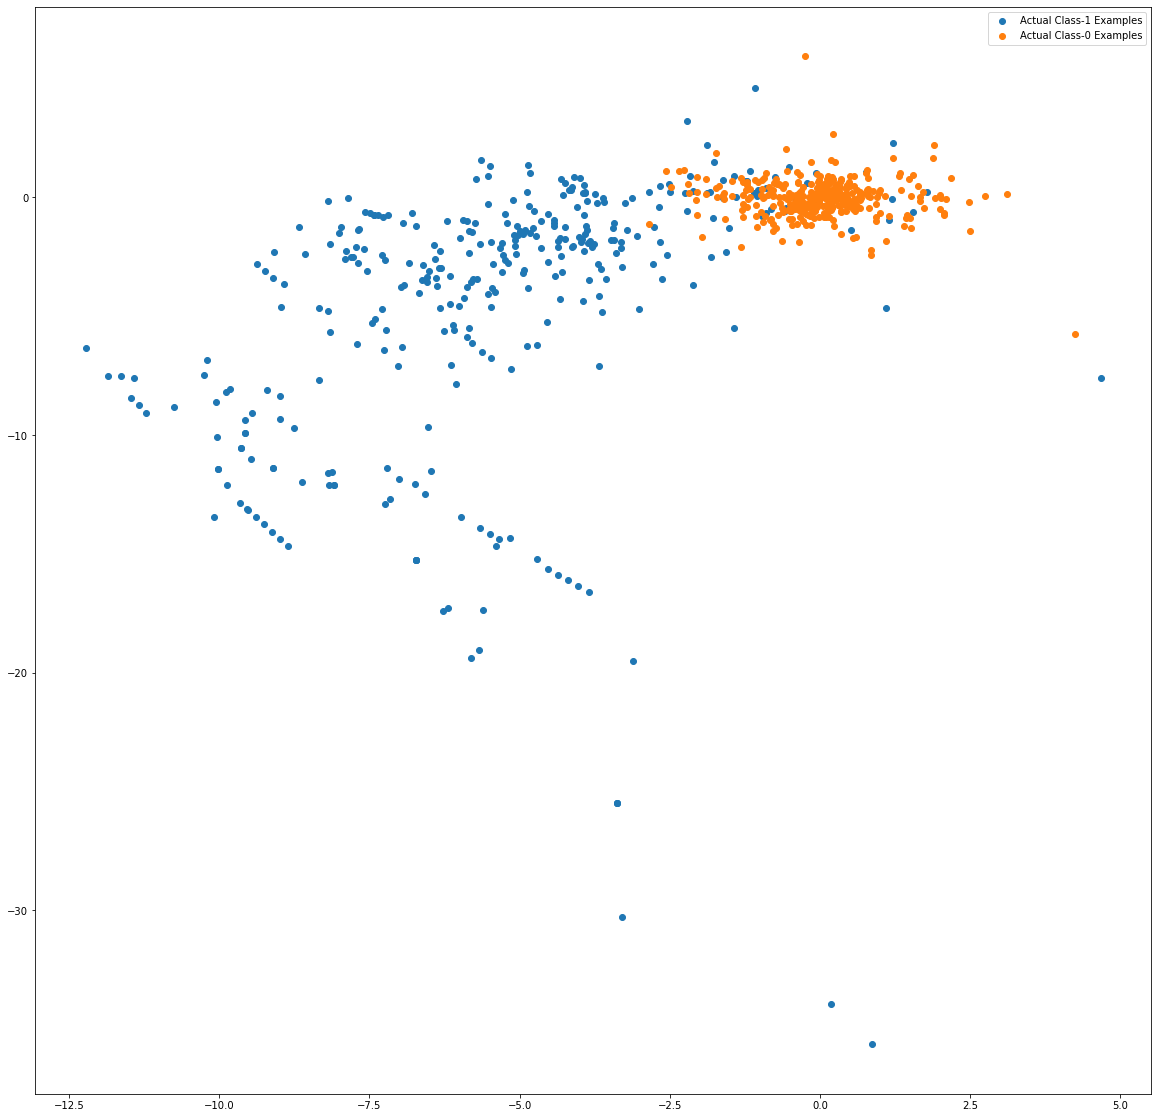

In [70]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [71]:
# Logistic Regression
from sklearn import linear_model #import the package

c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [72]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [73]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_ros, y_ros, test_size = 0.3, random_state=100)



In [74]:
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
   
# Fit the best algorithm to the data. 
logreg_cv.fit(X_train_cv, y_train_cv)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.9547712352821864


In [75]:
clf = LogisticRegression(C=0.43) 
 

clf.fit(X_train_cv, y_train_cv)

y_pred=clf.predict(X_test_cv)

In [76]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_cv, y_pred)
cnf_matrix

array([[58194,  1402],
       [ 3780, 56036]], dtype=int64)

Text(0.5, 1271.2, 'Predicted label')

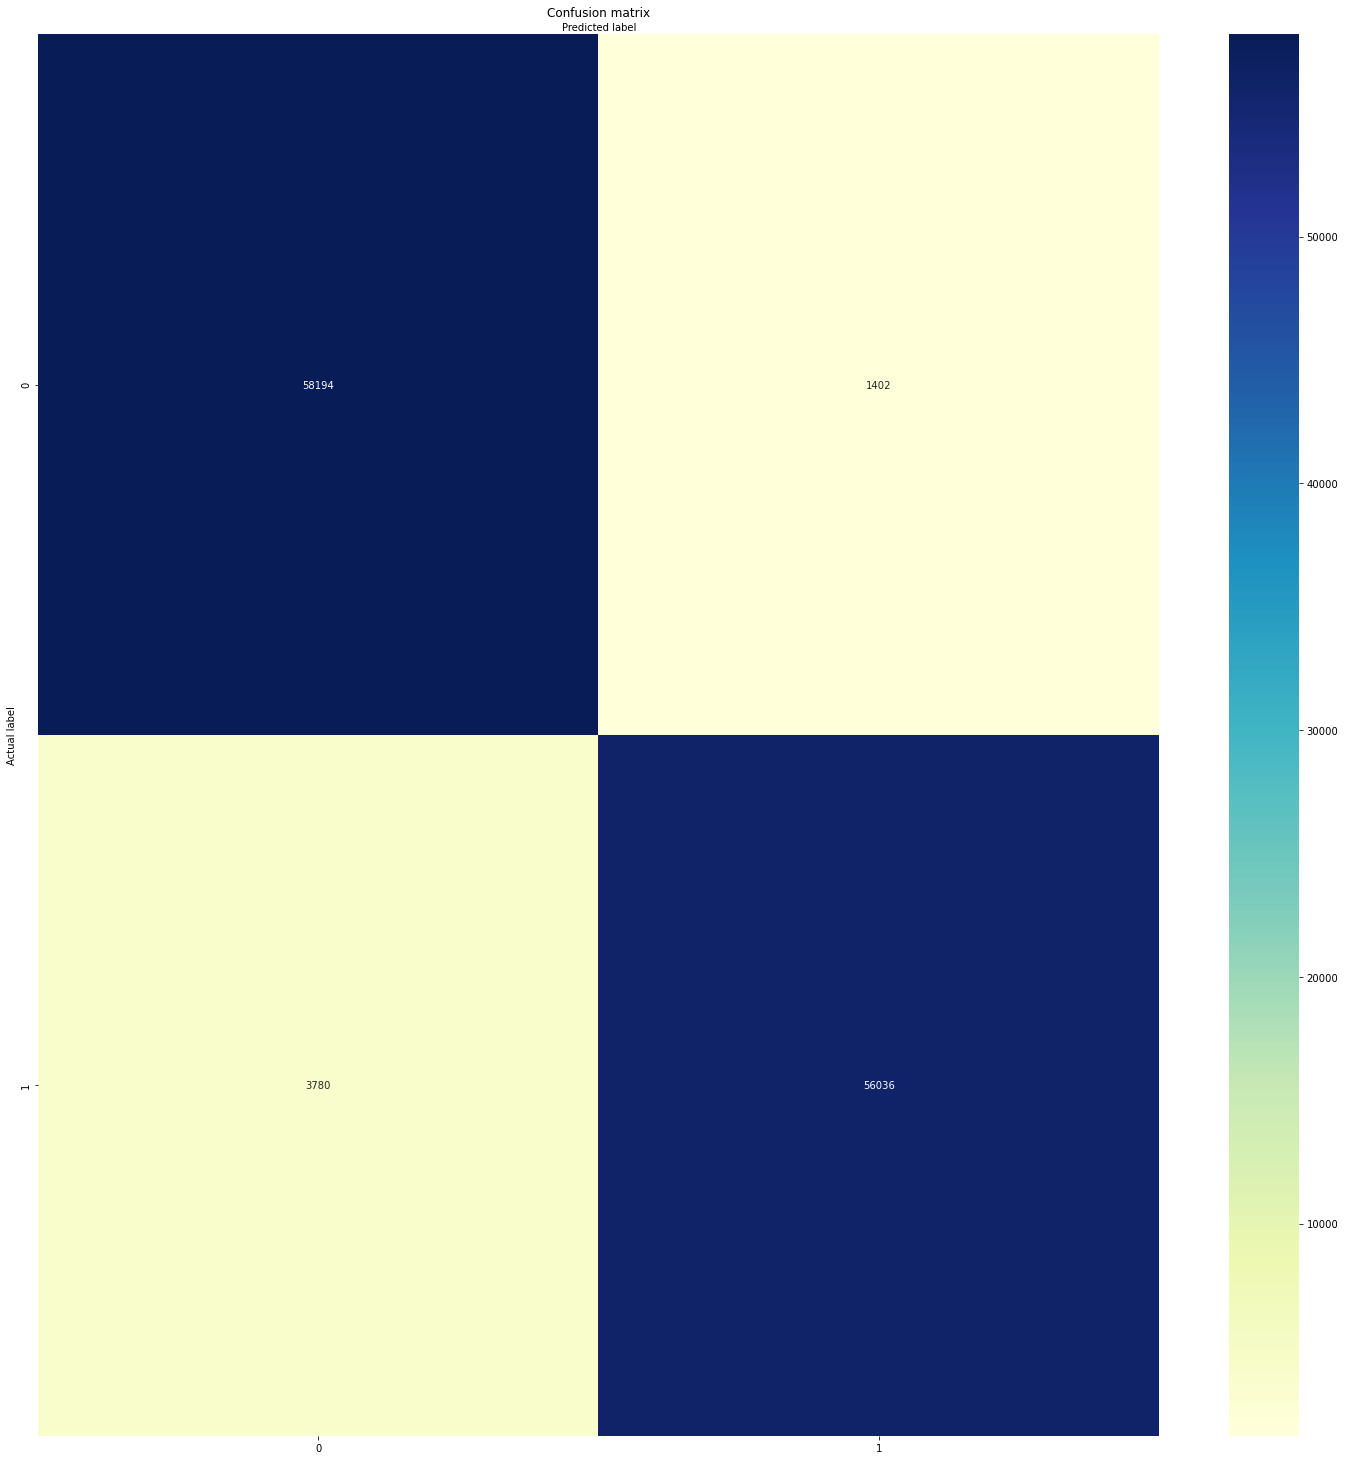

In [77]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test_cv, y_pred))
print("Precision:",metrics.precision_score(y_test_cv, y_pred))
print("Recall:",metrics.recall_score(y_test_cv, y_pred))

Accuracy: 0.9566040263960071
Precision: 0.9755910721125387
Recall: 0.9368062056974722


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## decision tree ROS

In [79]:
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_train_cv, y_train_cv) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1}
Best score is 0.9996339202256145


In [80]:
clf = DecisionTreeClassifier( criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=7, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0) 
 

clf.fit(X_train_cv, y_train_cv)

y_pred=clf.predict(X_test_cv)

In [81]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_cv, y_pred)
cnf_matrix

array([[59568,    28],
       [    0, 59816]], dtype=int64)

Text(0.5, 1271.2, 'Predicted label')

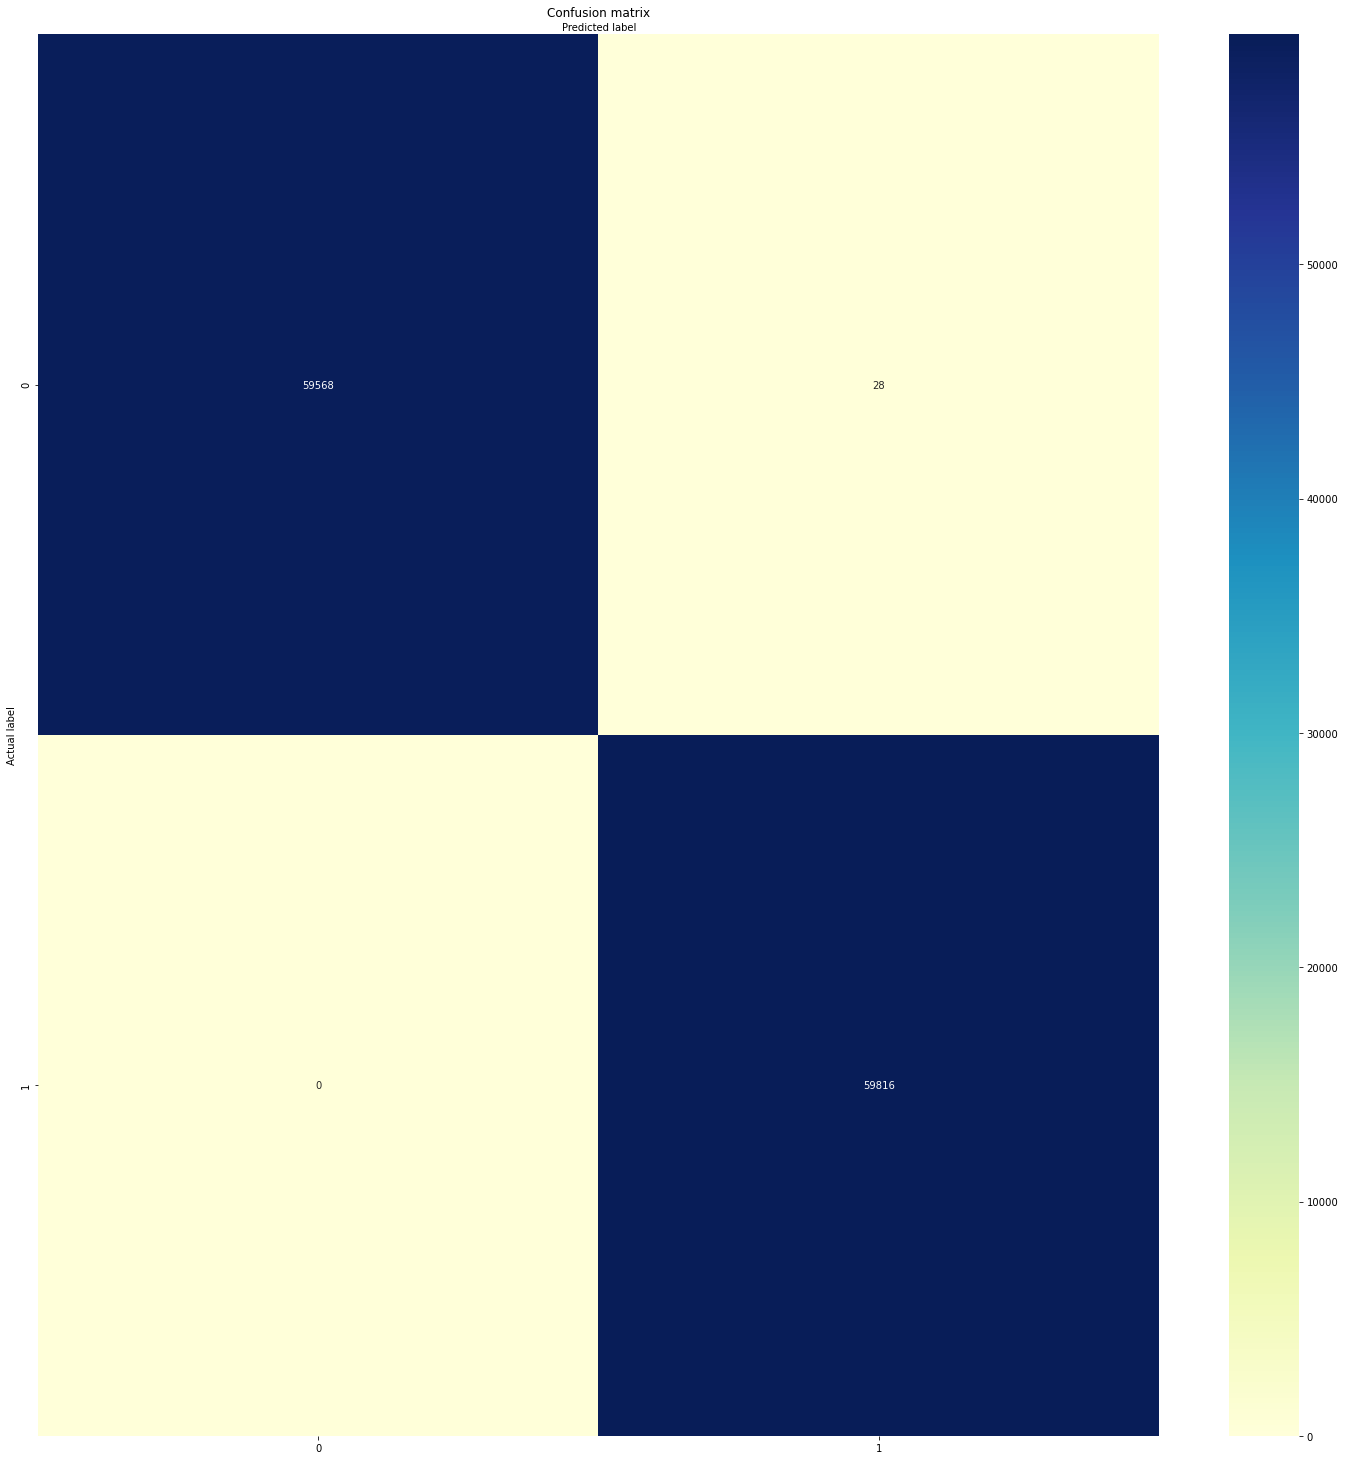

In [82]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test_cv, y_pred))
print("Precision:",metrics.precision_score(y_test_cv, y_pred))
print("Recall:",metrics.recall_score(y_test_cv, y_pred))

Accuracy: 0.9997655177034134
Precision: 0.9995321168371099
Recall: 1.0


### Print the class distribution after applying SMOTE 

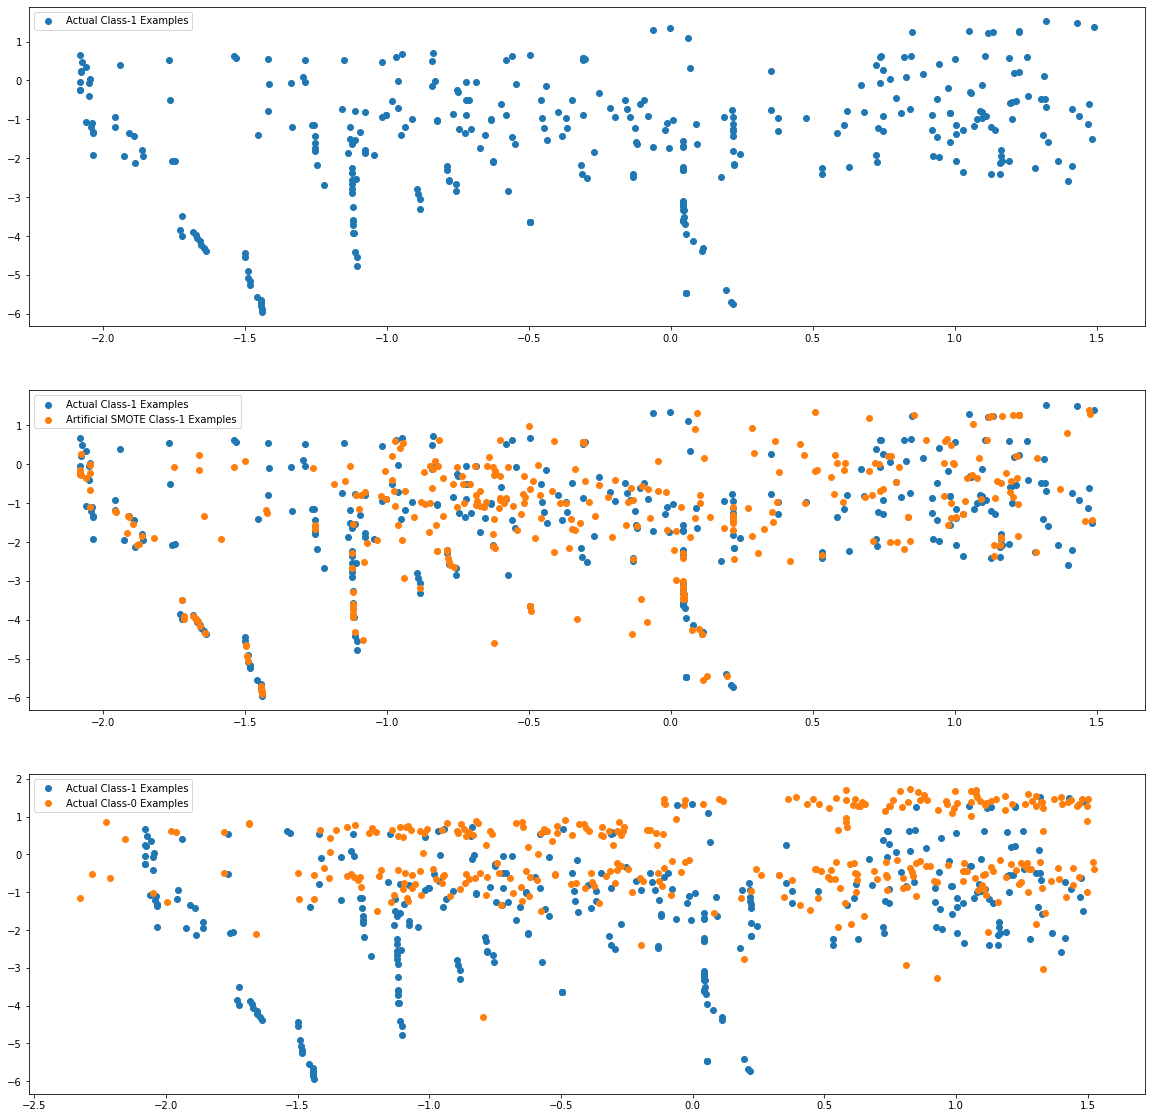

In [84]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [85]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train_smote, y_train_smote, test_size = 0.3, random_state=100)
#perform hyperparameter tuning
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
   
# Fit the best algorithm to the data. 
logreg_cv.fit(X_train_cv, y_train_cv)

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.957986993948327


In [86]:
clf = LogisticRegression(C=268.2695795279727) 
 

clf.fit(X_train_cv, y_train_cv)

y_pred=clf.predict(X_test_cv)

##### Build models on other algorithms to see the better performing on SMOTE

## Some more models 

In [87]:
def feature_scaling(X, X_test=X_test):
    std_scale = StandardScaler().fit(X)
    X_std = std_scale.transform(X)
    X_test_std = std_scale.transform(X_test)
    return X_std, X_test_std
X_ros_std, X_test_ros_std = feature_scaling(X_ros)
X_smote_std, X_test_smote_std = feature_scaling(X_train_smote)

In [88]:
pca = PCA(n_components=2)
X_ros_pca = pca.fit_transform(X_ros_std)
X_smote_pca = pca.fit_transform(X_smote_std)

In [89]:
def plot_2d_space(X, y, label='Classes'):
    '''Plots the data points in a 2D scatterplot.'''
    colors = ['blue', 'red']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y==l, 0], X[y==l, 1], c=c, label=l, marker=m)
    plt.title(label)
    plt.legend(loc='best')
    plt.show()

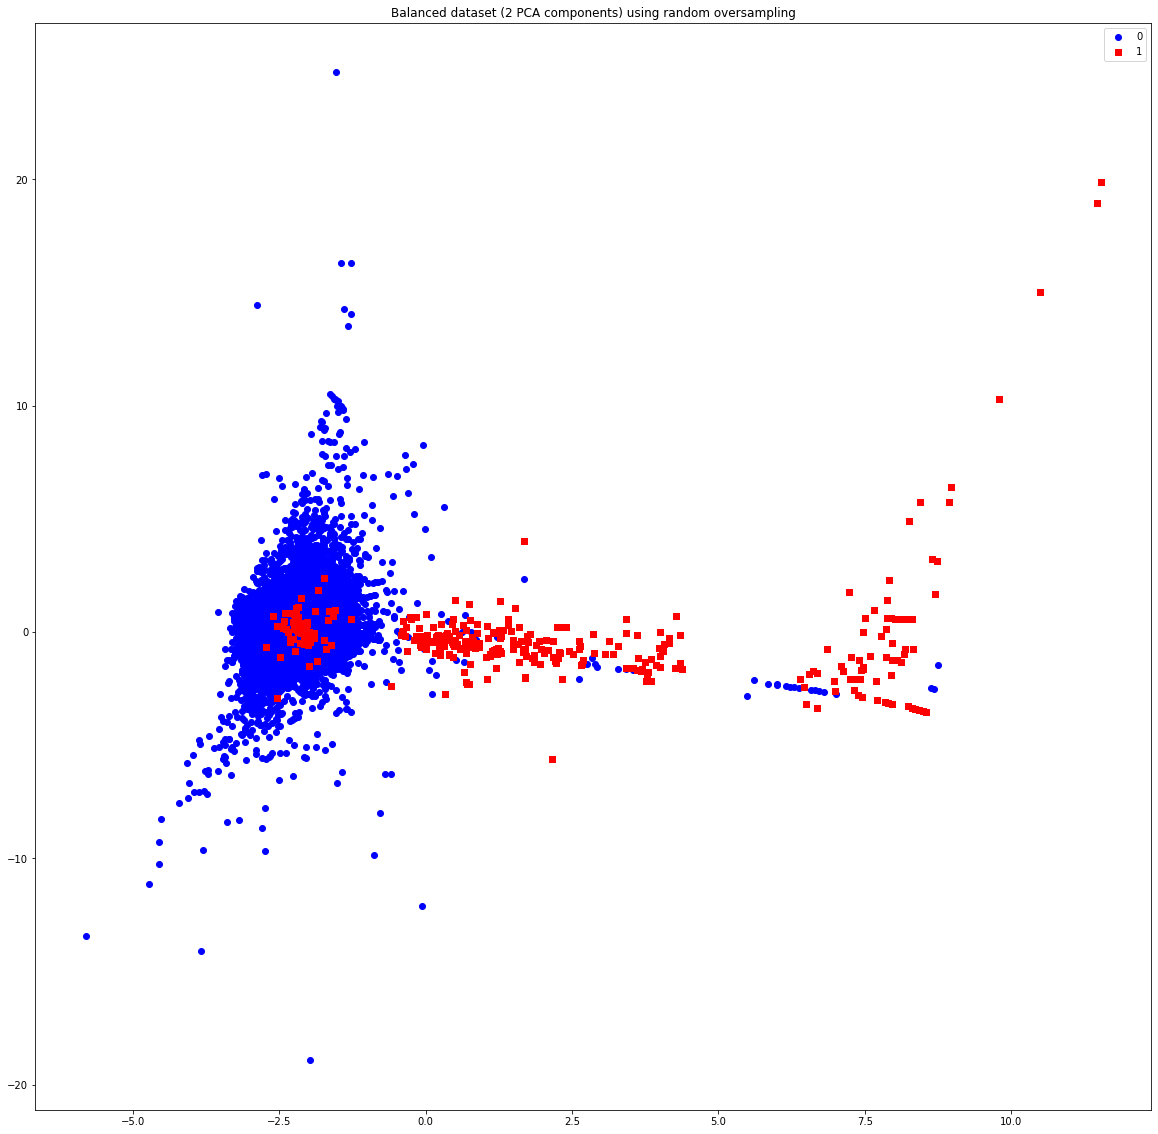

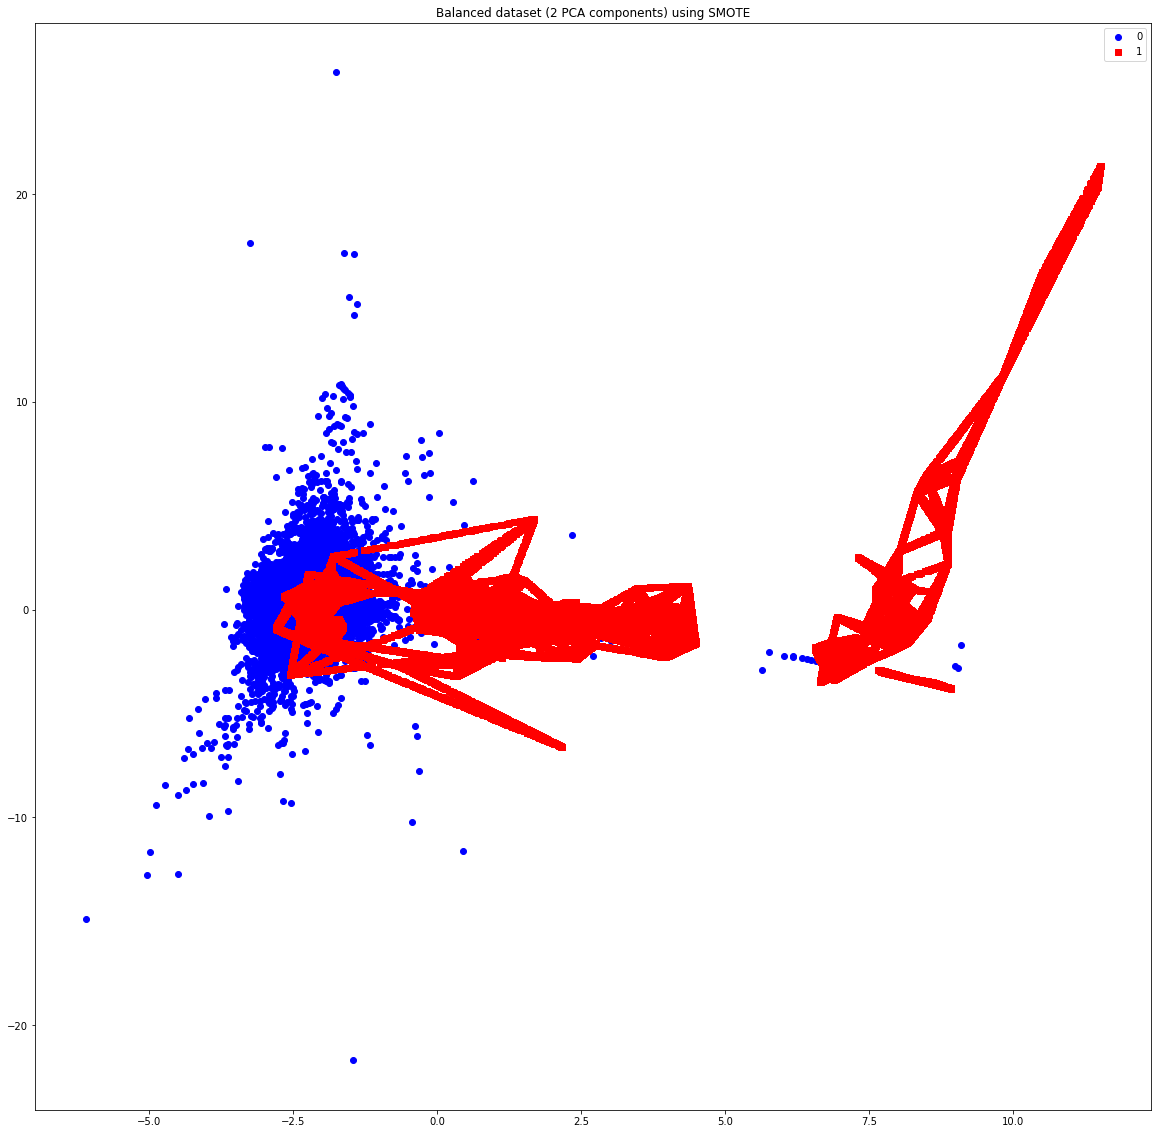

In [90]:

plot_2d_space(X_ros_pca, y_ros, 'Balanced dataset (2 PCA components) using random oversampling')
plot_2d_space(X_smote_pca, y_train_smote, 'Balanced dataset (2 PCA components) using SMOTE')

In [95]:

classifiers = []

classifiers.append(('Logistic Regression', LogisticRegression(random_state=42)))
classifiers.append(('Naive Bayes', GaussianNB()))
#classifiers.append(('KNN', KNeighborsClassifier()))
classifiers.append(('Decision Tree', DecisionTreeClassifier(random_state=42)))
#classifiers.append(('Random Forest', RandomForestClassifier(random_state=42)))
#classifiers.append(('SVM', SVC(random_state=42, probability=True))) #This one takes a very long time to run!
#Ensemble classifier - All classifiers have the same weight
eclf = VotingClassifier(estimators=classifiers, voting='soft', weights=np.ones(len(classifiers)))

In [96]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [98]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test):
    '''Plots the ROC curve and the confusion matrix, and calculates AUC, recall and precision.'''
    
    name = classifier[0]
    classifier = classifier[1]

    mean_fpr = np.linspace(0, 1, 100)
    class_names = ['Non-Fraud', 'Fraud']
    confusion_matrix_total = [[0, 0], [0, 0]]
    
    #Obtain probabilities for each class
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - model: ' + name)
    plt.legend(loc="lower right")
    plt.show()
    
    #Store the confusion matrix result to plot a table later
    y_pred=classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrix_total += cnf_matrix
    
    #Print precision and recall
    tn, fp = confusion_matrix_total.tolist()[0]
    fn, tp = confusion_matrix_total.tolist()[1]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy = {:2.2f}%'.format(accuracy*100))
    print('Precision = {:2.2f}%'.format(precision*100))
    print('Recall = {:2.2f}%'.format(recall*100))
    
    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(confusion_matrix_total, classes=class_names, title='Confusion matrix - model: ' + name)
    plt.show()

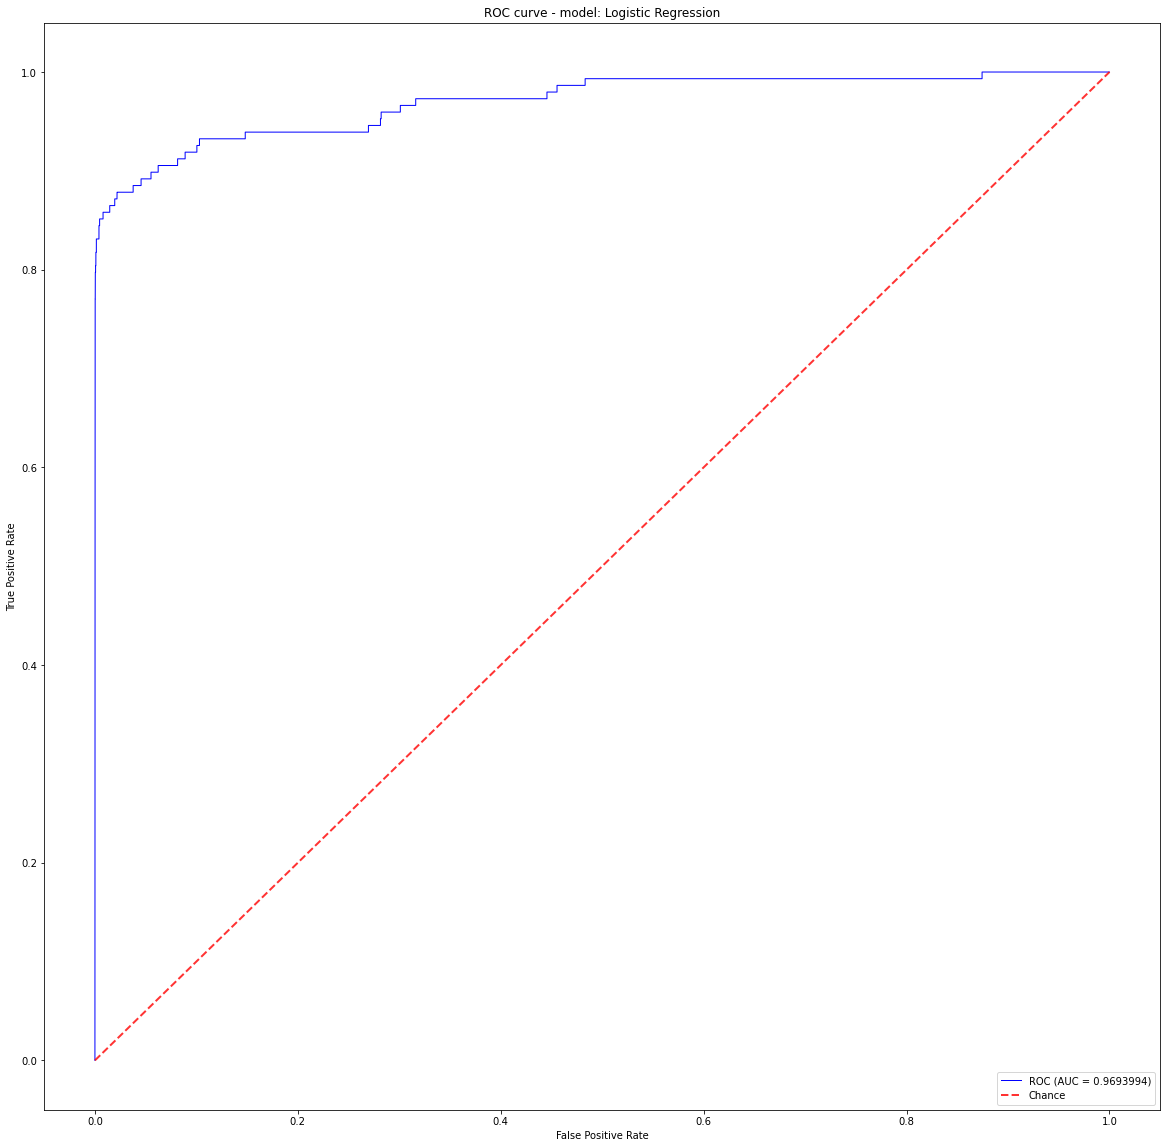

Accuracy = 97.58%
Precision = 5.97%
Recall = 87.84%


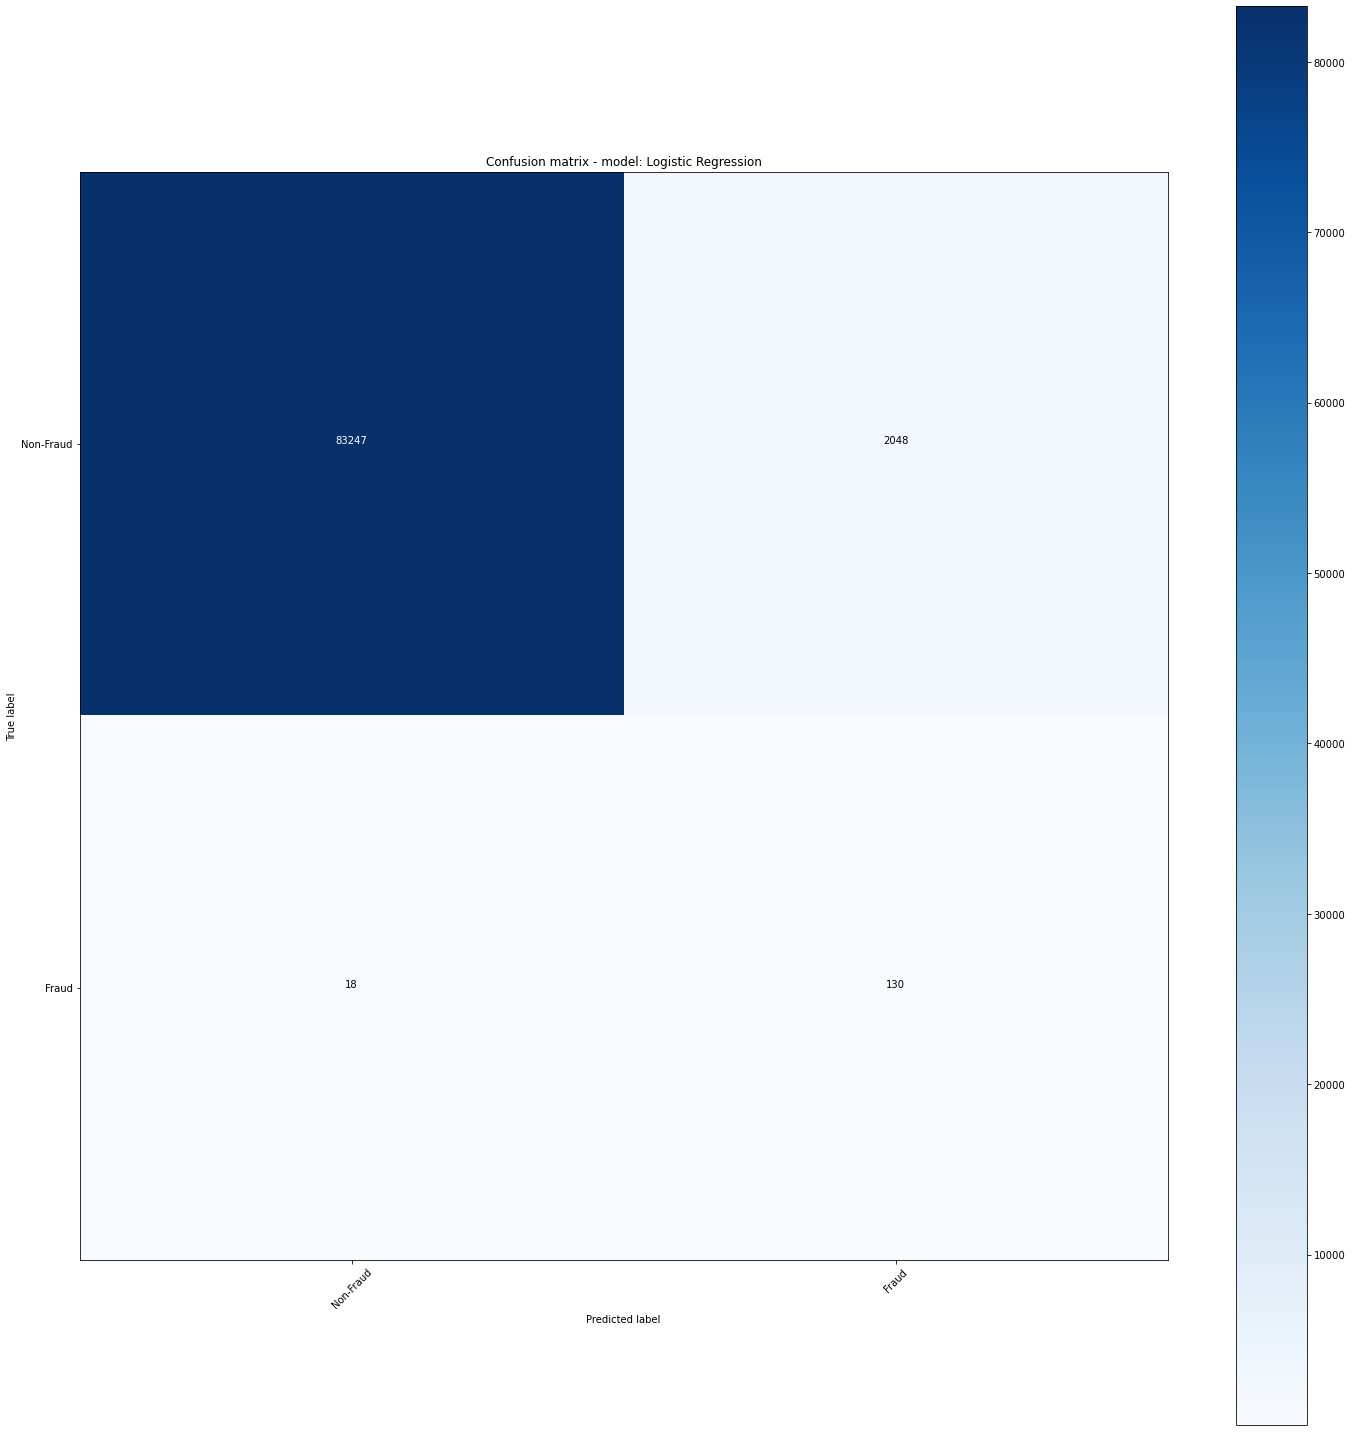

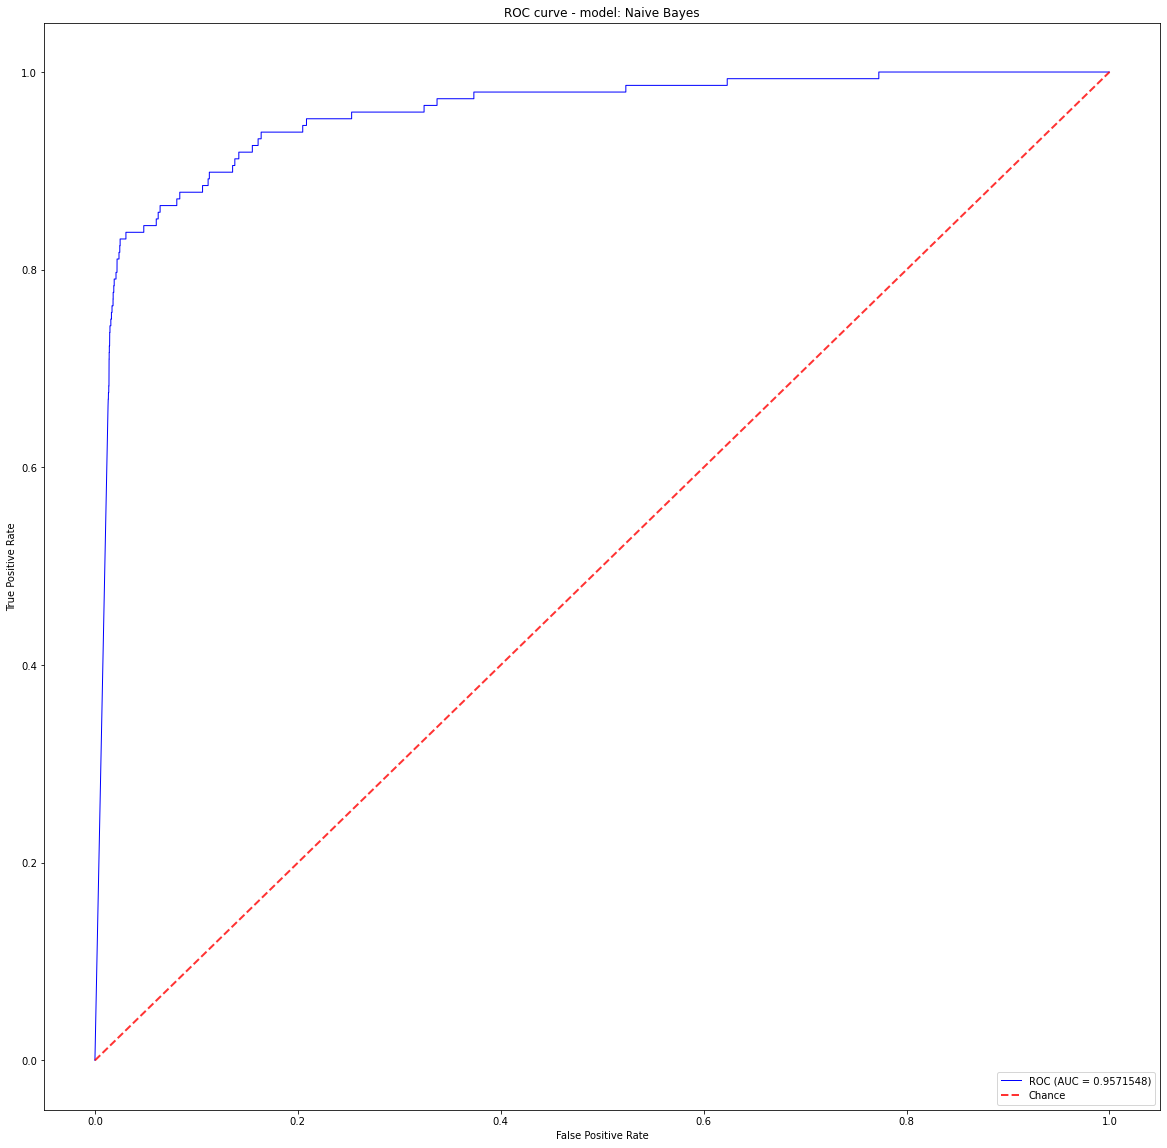

Accuracy = 97.31%
Precision = 5.14%
Recall = 83.11%


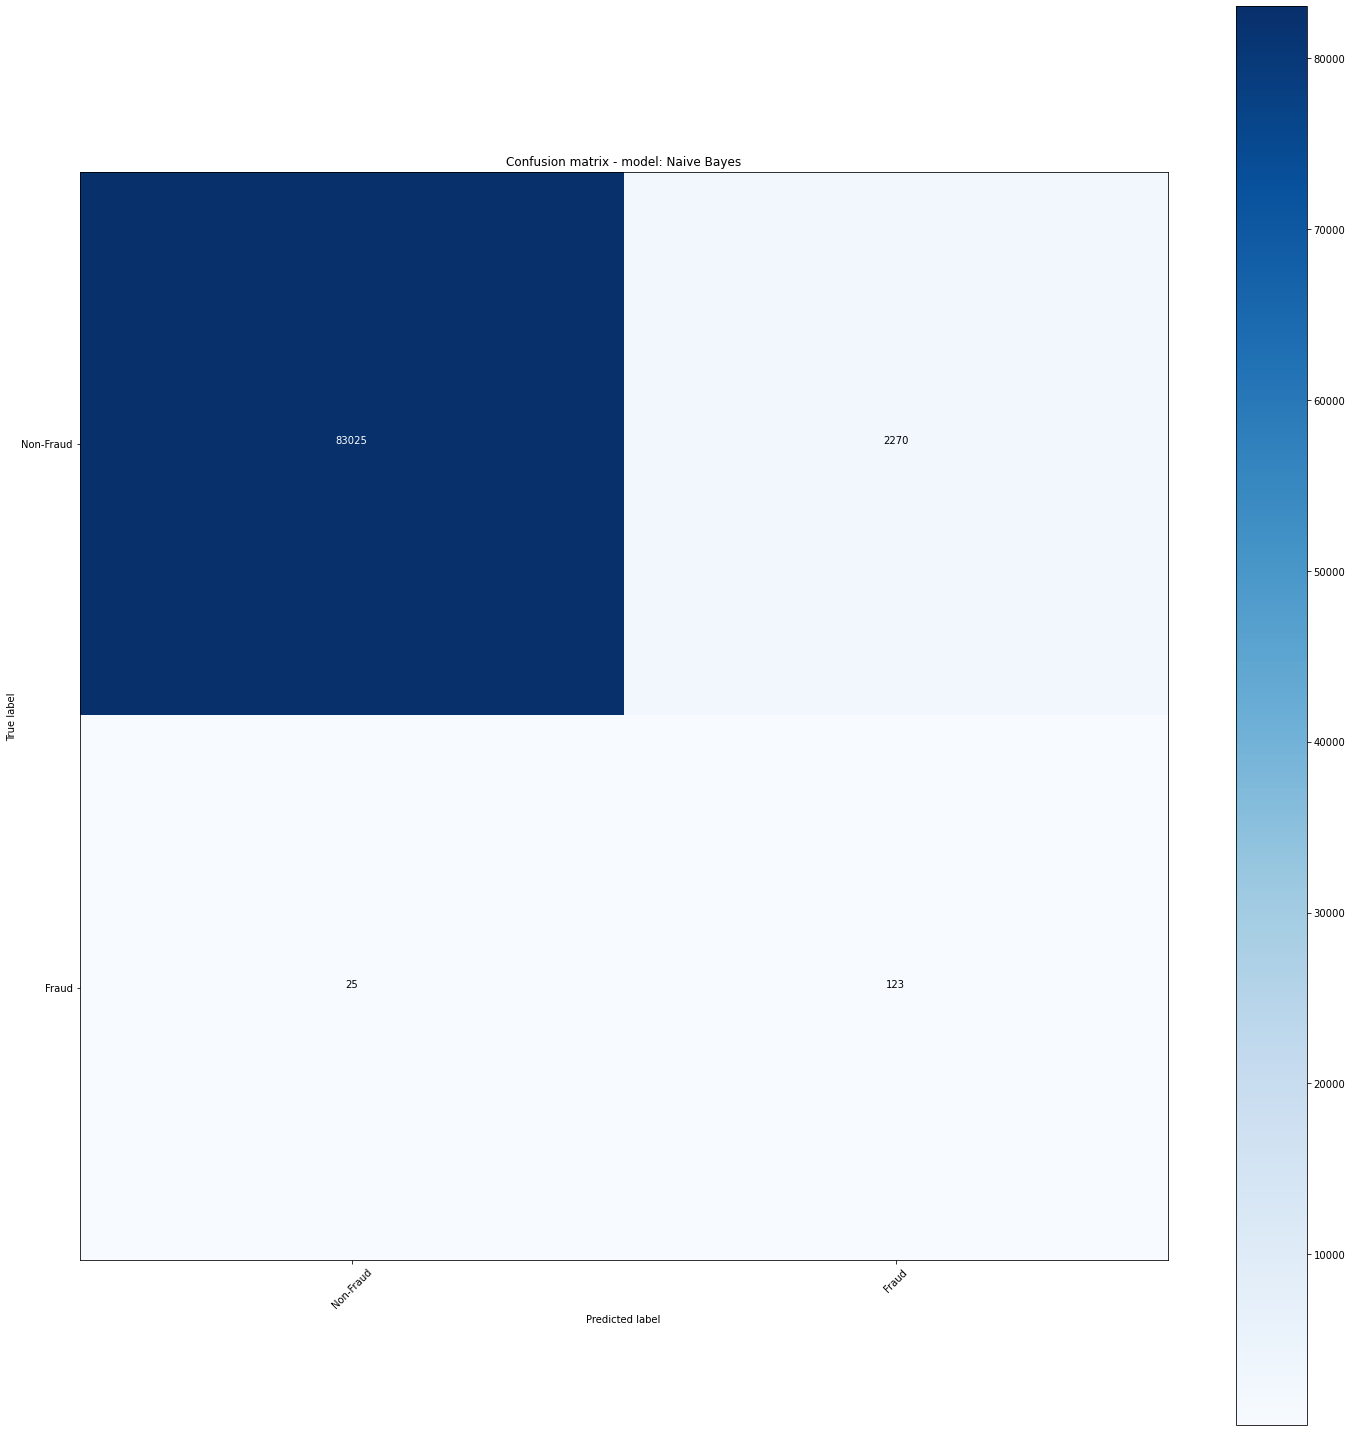

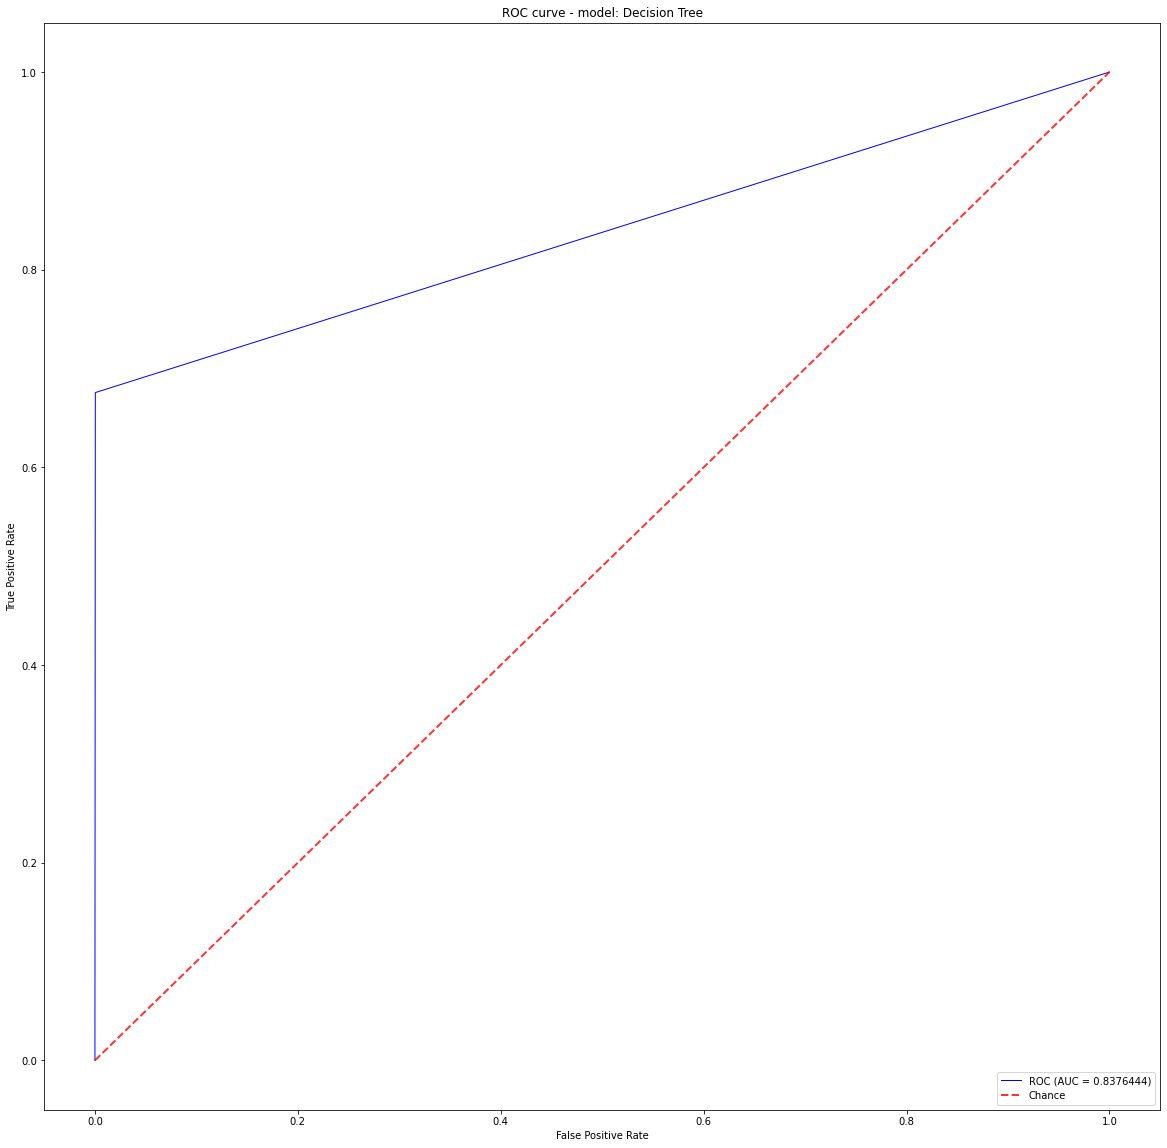

Accuracy = 99.91%
Precision = 75.19%
Recall = 67.57%


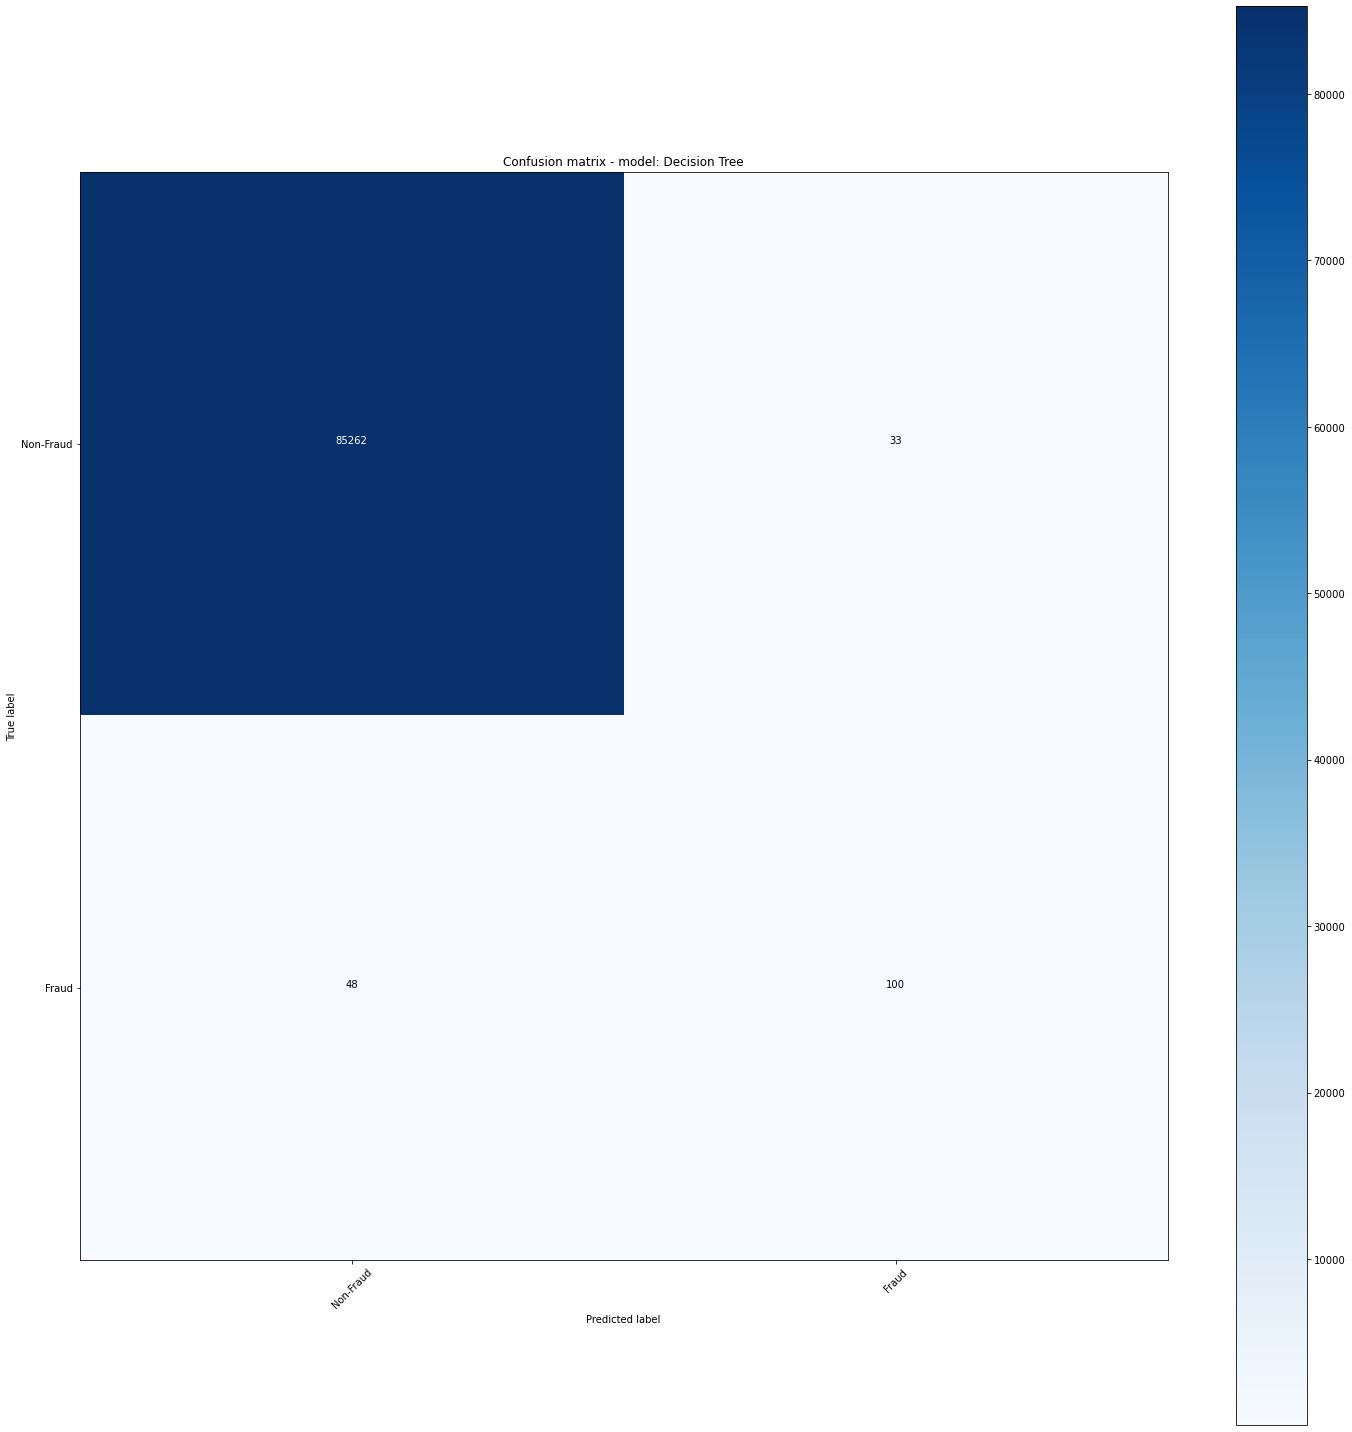

In [99]:
for clf in classifiers:
    plot_CM_and_ROC_curve(clf, X_ros_std, y_ros, X_test_ros_std, y_test)

### Print the class distribution after applying ADASYN

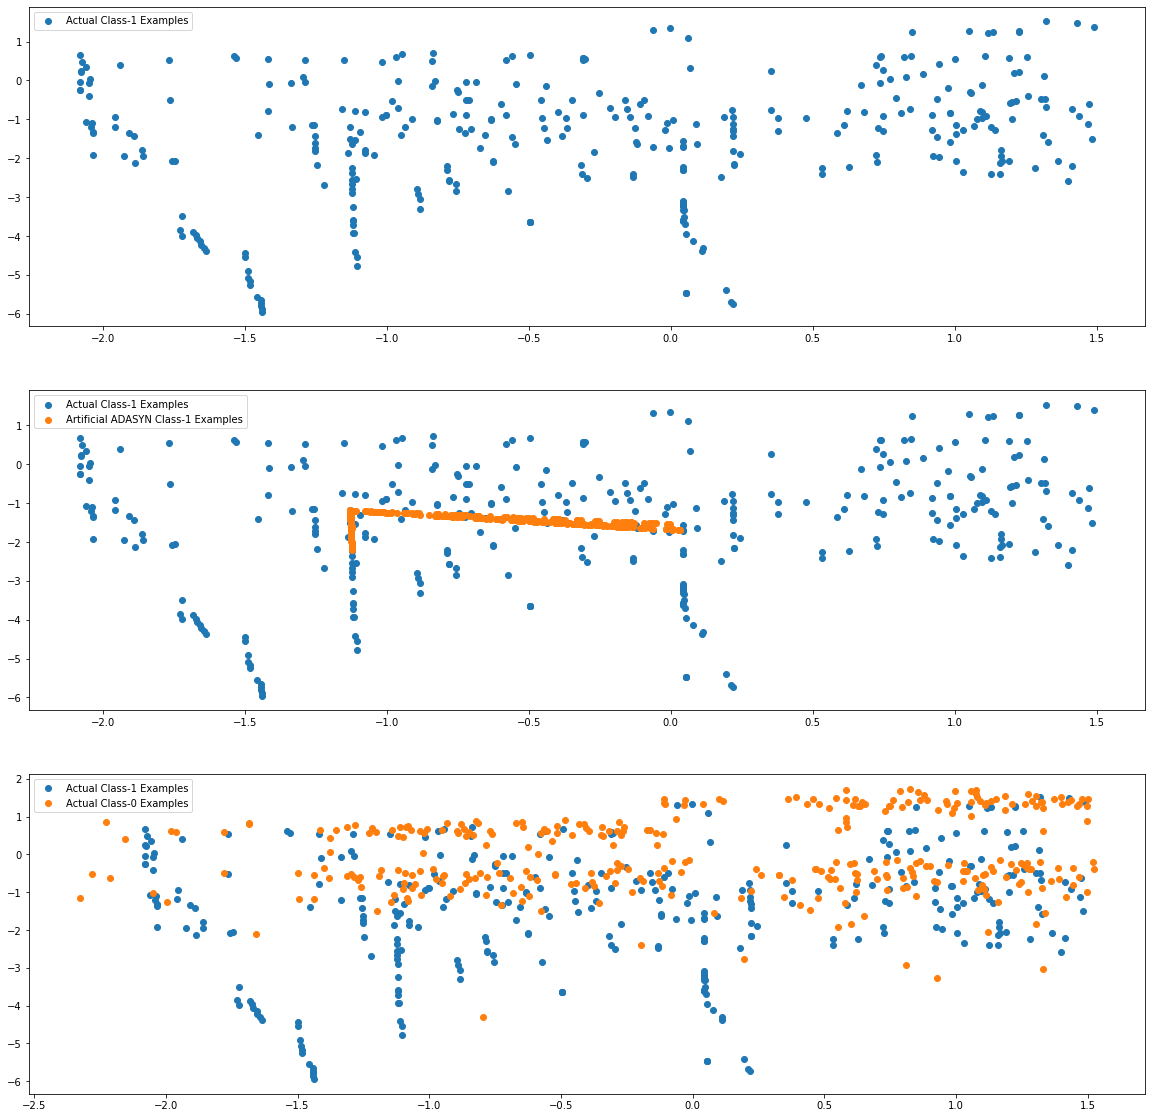

In [153]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [154]:
#perform cross validation & 

X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train_adasyn, y_train_adasyn, test_size = 0.3, random_state=100)
#perform hyperparameter tuning
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
 

    
# Fit the best algorithm to the data. 
logreg_cv.fit(X_train_cv, y_train_cv)

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.9123215093795002


In [159]:
clf = LogisticRegression(C= 3.727593720314938) 
 

clf.fit(X_train_cv, y_train_cv)

y_pred=clf.predict(X_test_cv)

In [160]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_cv, y_pred)
cnf_matrix

array([[54990,  4589],
       [ 6110, 53730]], dtype=int64)

Text(0.5, 1271.2, 'Predicted label')

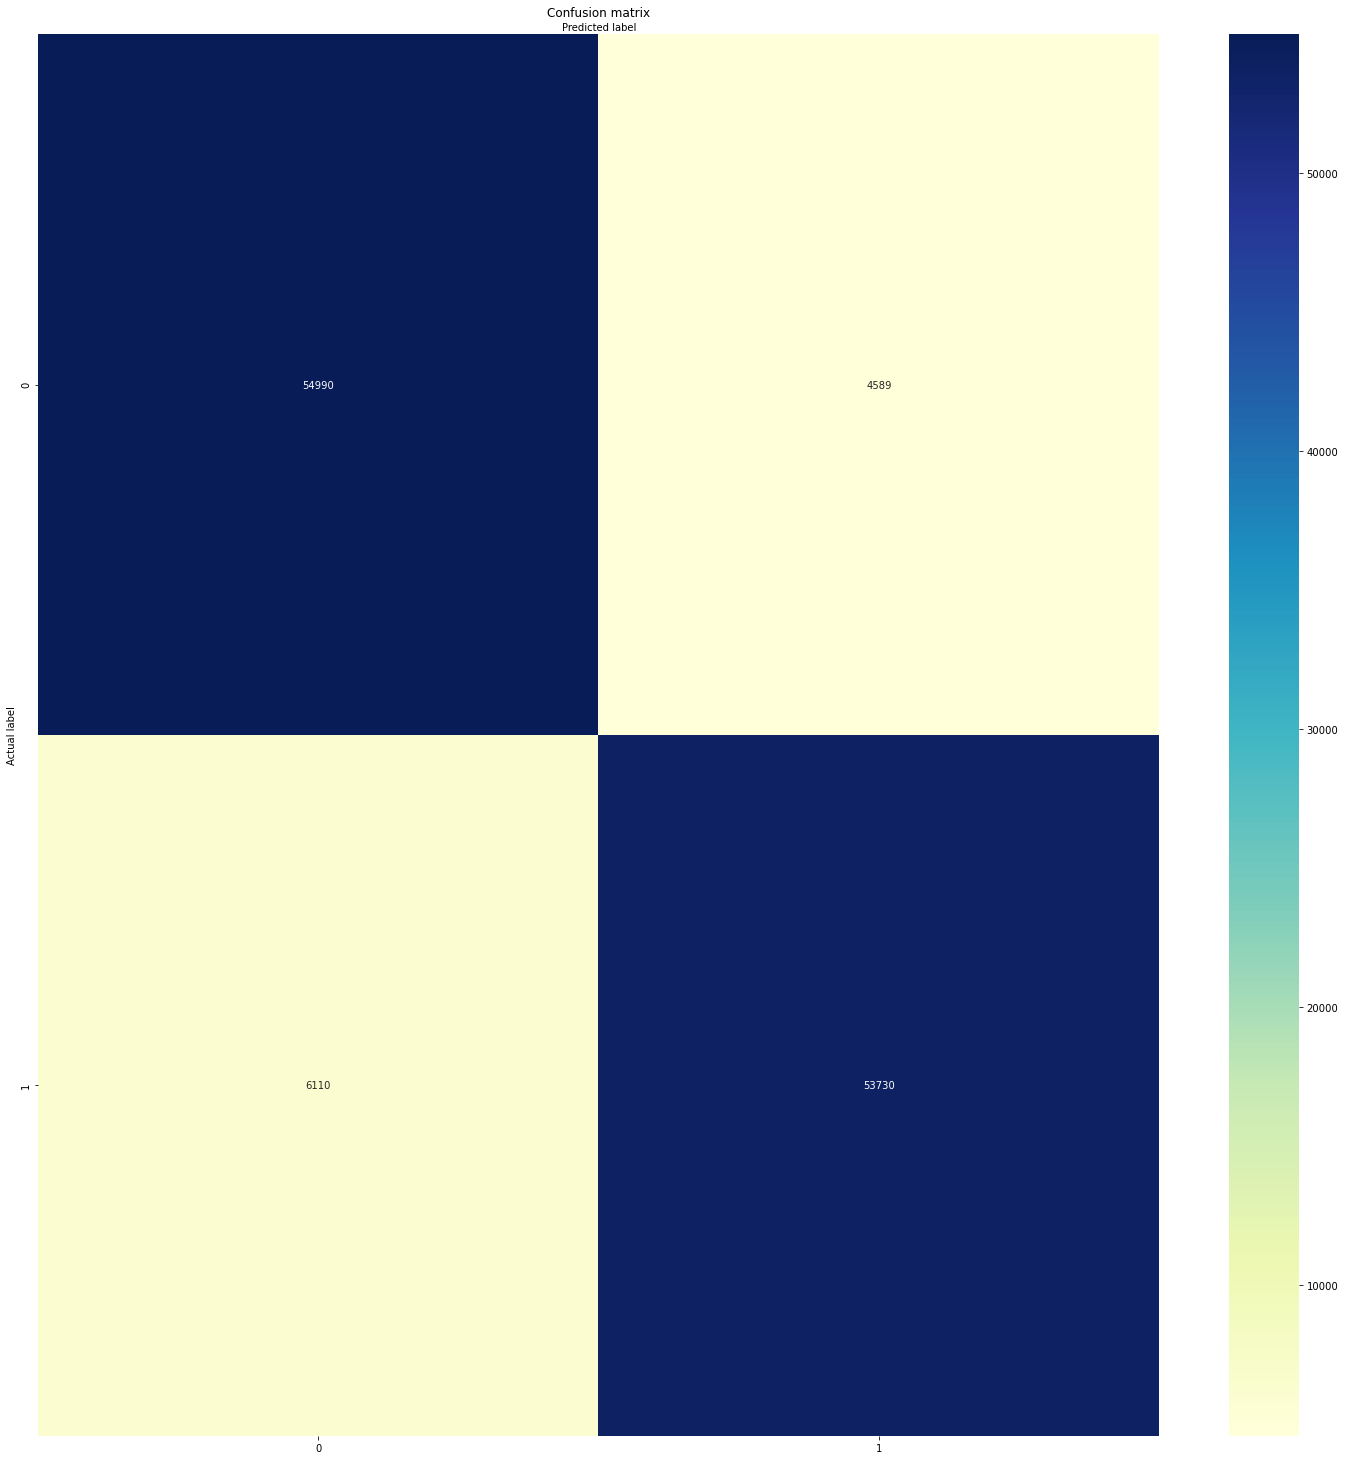

In [161]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [162]:
print("Accuracy:",metrics.accuracy_score(y_test_cv, y_pred))
print("Precision:",metrics.precision_score(y_test_cv, y_pred))
print("Recall:",metrics.recall_score(y_test_cv, y_pred))

Accuracy: 0.910407891541547
Precision: 0.9213120938287693
Recall: 0.897894385026738


##### Build models on other algorithms to see the better performing on ADASYN

In [163]:
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_train_cv, y_train_cv) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1}
Best score is 0.9978933625165386


In [169]:
clf = DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=3, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0) 
 

clf.fit(X_train_cv, y_train_cv)

y_pred=clf.predict(X_test_cv)

In [170]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_cv, y_pred)
cnf_matrix

array([[59439,   140],
       [   59, 59781]], dtype=int64)

Text(0.5, 1271.2, 'Predicted label')

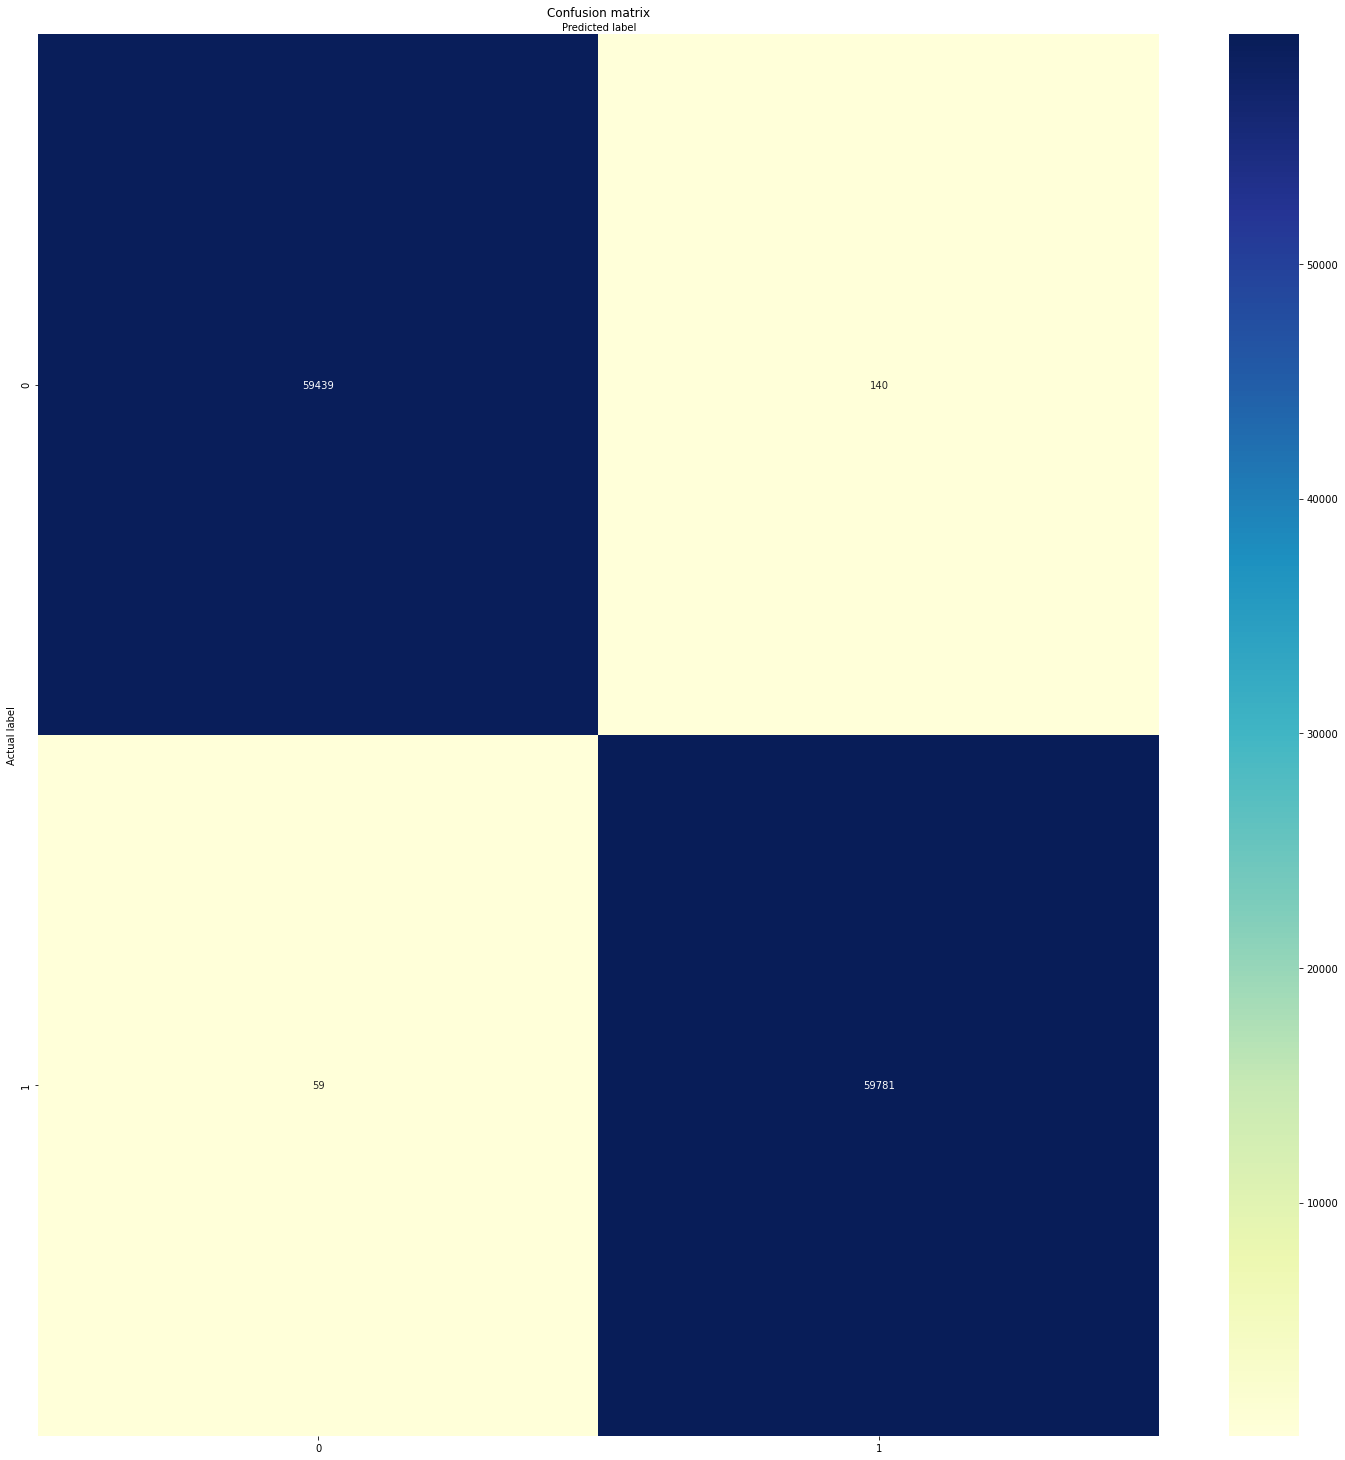

In [171]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [172]:
print("Accuracy:",metrics.accuracy_score(y_test_cv, y_pred))
print("Precision:",metrics.precision_score(y_test_cv, y_pred))
print("Recall:",metrics.recall_score(y_test_cv, y_pred))

Accuracy: 0.9983335985061004
Precision: 0.9976635903940188
Recall: 0.9990140374331551


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### We are using decision trees with the best hyper parameters and ADASYN as the oversampling method for balancing the class

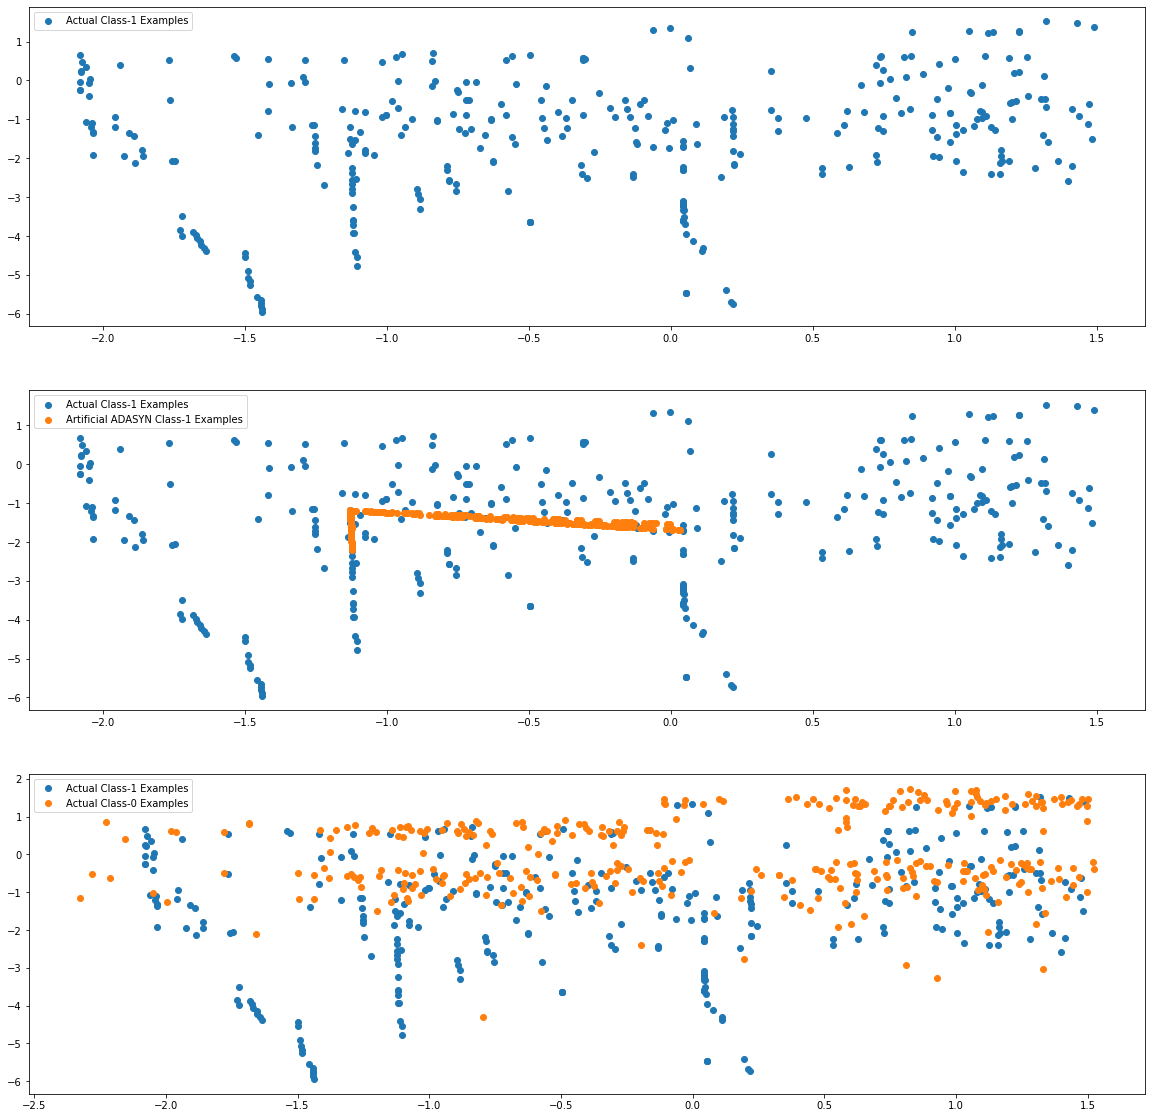

In [201]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)



# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [202]:
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_train_adasyn, y_train_adasyn) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 7}
Best score is 0.9082304288973996


In [220]:
clf = DecisionTreeClassifier( criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=7, min_weight_fraction_leaf=0.0, max_features=6, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0) 
 
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

In [222]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[85279,    16],
       [   48,   100]], dtype=int64)

Text(0.5, 1271.2, 'Predicted label')

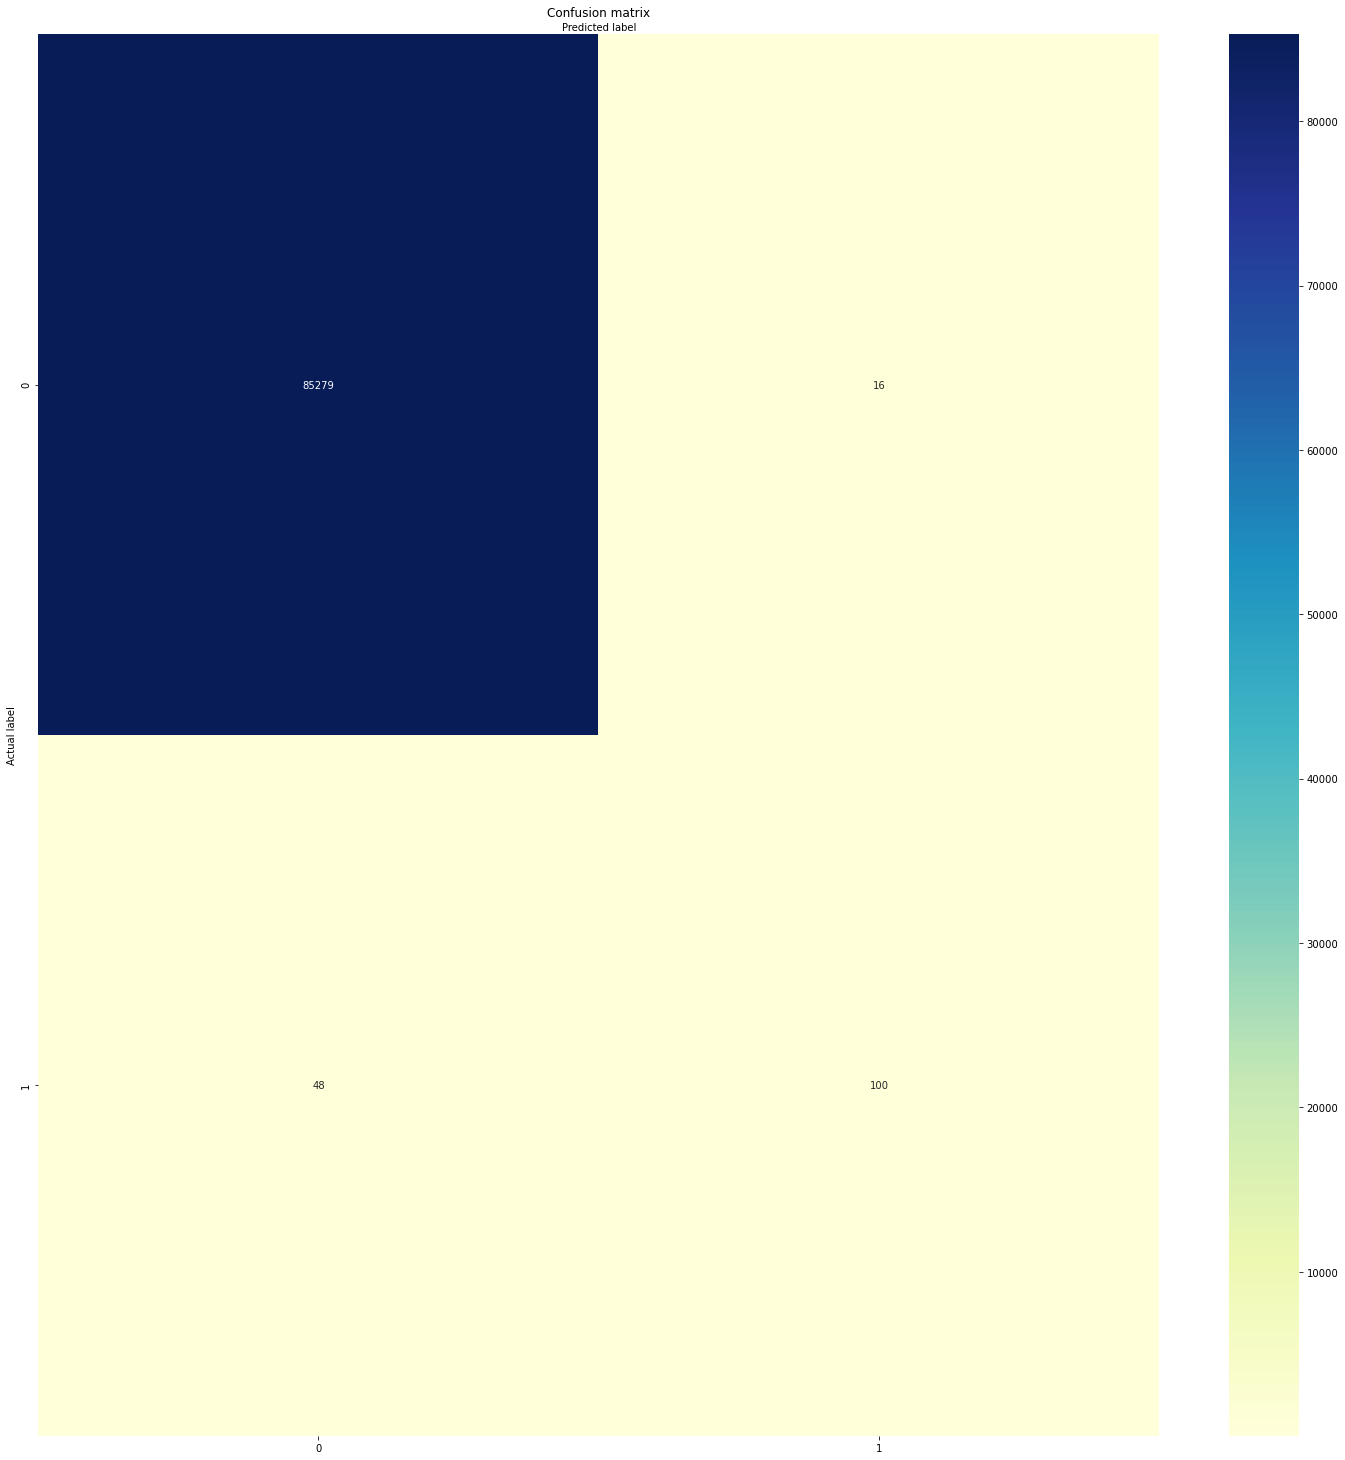

In [223]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Evaluation metric 

In [226]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9992509626300574
Precision: 0.8620689655172413
Recall: 0.6756756756756757


### Print the important features of the best model to understand the dataset

Top var = 4
2nd Top var = 15
3rd Top var = 10


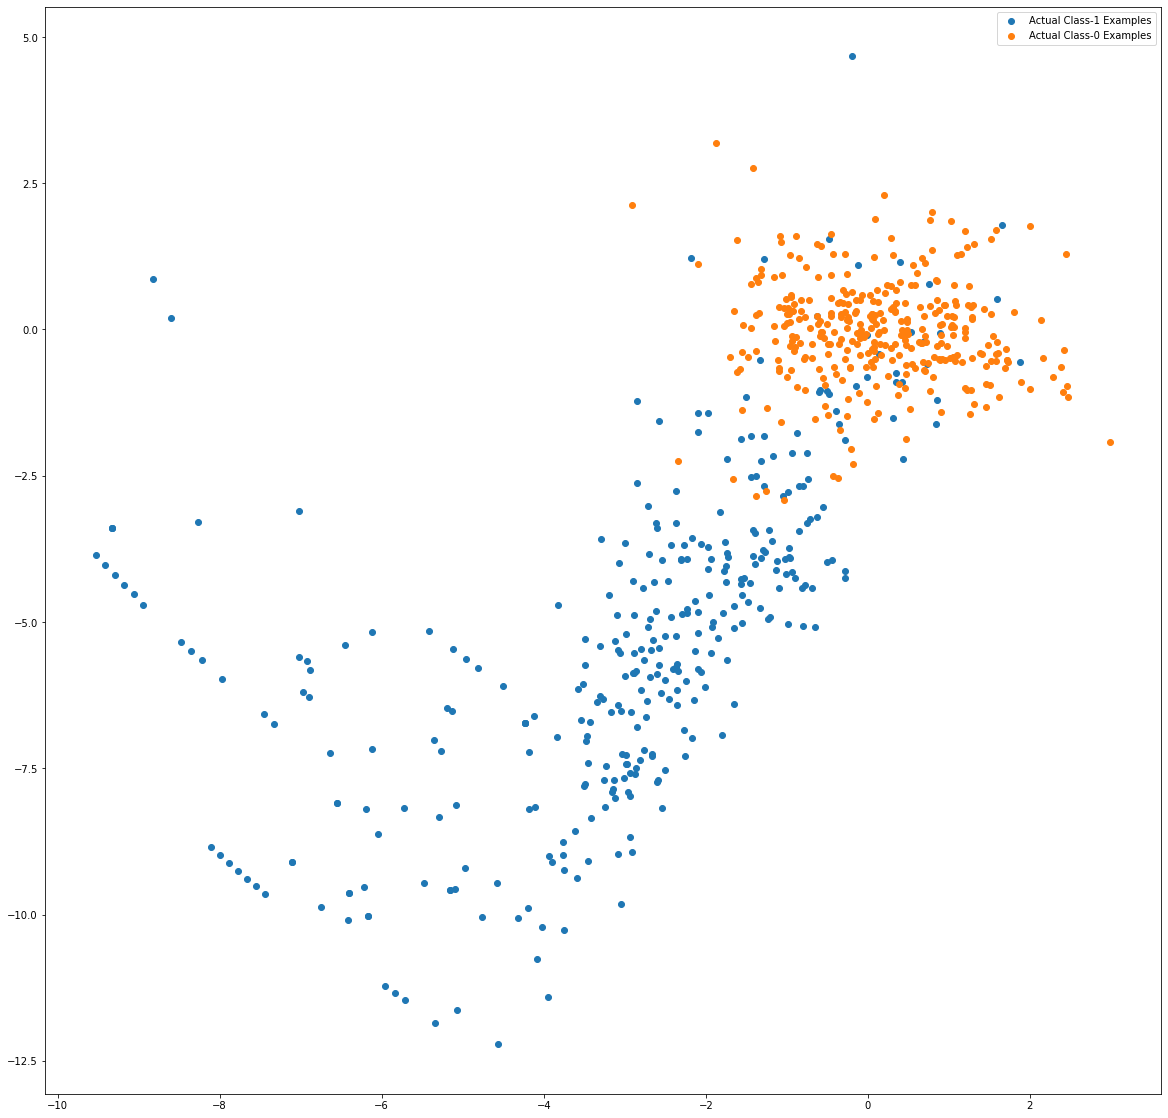

In [227]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_pt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_pt.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [228]:
#### Print the FPR,TPR & select the best threshold from the roc curve
TP = cnf_matrix[1,1]  
TN = cnf_matrix[0,0] 
FP = cnf_matrix[0,1] 
FN = cnf_matrix[1,0] 

In [236]:
y_prob = clf.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
clf.score(X_test, y_pred)

1.0

In [237]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[85279,    16],
       [   48,   100]], dtype=int64)

### auc for the final model

In [238]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc


0.8377440457046529

In [239]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8746756091339596

Text(0.5, 0, 'False Positive Rate')

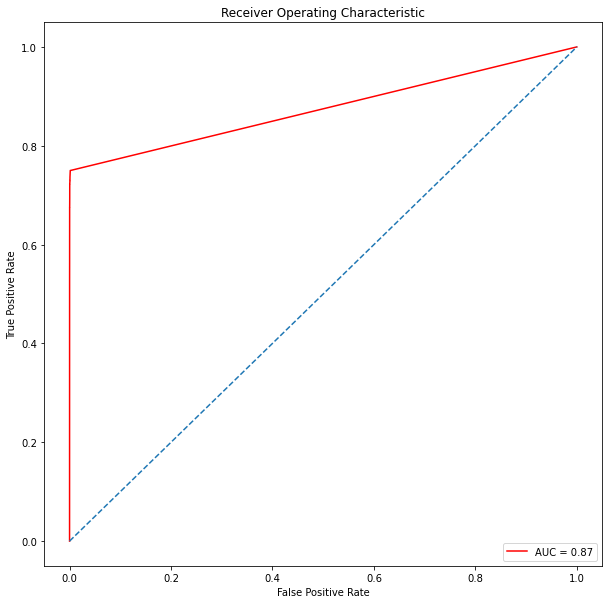

In [240]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [229]:
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)
print('FPR =',FPR*100,'%' )
print('TPR =',TPR*100,'%' )

FPR = 0.018758426636965822 %
TPR = 67.56756756756756 %


In [241]:
thresholds

array([2.        , 1.        , 0.85714286, 0.8       , 0.75      ,
       0.71428571, 0.6       , 0.57142857, 0.5       , 0.42857143,
       0.38461538, 0.33333333, 0.30769231, 0.28571429, 0.25      ,
       0.18181818, 0.14285714, 0.125     , 0.11111111, 0.09090909,
       0.08333333, 0.        ])

In [243]:
threshold = thresholds[np.argmax(tpr-fpr)]
threshold

1.0

In [231]:
print('Train auc =', metrics.roc_auc_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print('threshold',threshold)

Train auc = 0.8377440457046529
threshold 1


### We can say that decision tree with adasyn class balancing provides a good Predictions for Fraudulent cases.


### The model shows Accuracy: 99.92%,  which is an excellent and optimal for a possible model on this data set.
